In [478]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from scipy.spatial.distance import pdist, cdist

import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import re
from nltk.tokenize import sent_tokenize, word_tokenize 
import scipy 
from scipy import spatial 
from nltk.tokenize.toktok import ToktokTokenizer 

import time
import math
import re
from textblob import TextBlob
import pandas as pd

import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import string

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import coo_matrix
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim

from nltk.tag import StanfordNERTagger
from nltk.parse.stanford import StanfordDependencyParser
from nltk.tokenize import word_tokenize
from nltk.tag import StanfordPOSTagger
import nltk
nltk.download('averaged_perceptron_tagger')
  

import os
from graphviz import Source

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mwehr/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
#path = 'C:/Users/wehrm/OneDrive/Documents/UChicago/Quarter 3/NLP/Final project/'
data = pd.read_pickle('news_chicago_il.pkl')
data.head()

crawled_date language                                               text  \
0   2019-10-31  english  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1   2019-10-31  english  Chicago's teachers union voted to approve a te...   
2   2019-10-31  english  News KnowThis: Trump vs. Chicago & Relentless ...   
3   2019-10-31  english  You may have noticed that markets are taking a...   
4   2019-10-31  english  Anxious students feeling pinch amid Chicago te...   

                                               title  
0  Police say Illinois man targeted, killed in ea...  
1  Chicago teachers strike continues with tentati...  
2  KnowThis: Trump vs. Chicago & Relentless Fires...  
3  Jim Cramer Explains Why Markets Tanked on Weak...  
4  Anxious students feeling pinch amid Chicago te...

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49122 entries, 0 to 49121
Data columns (total 4 columns):
crawled_date    49122 non-null datetime64[ns]
language        49122 non-null object
text            49122 non-null object
title           49122 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


# 1.) Article clean up and filtering

## 1.1) Basic cleaning

See if there are any non-english articles:

In [7]:
data['language'].unique()

array(['english'], dtype=object)

Combine title (if avaialable) and text to get all relevant information in one column/row:

In [8]:
data['combined'] = data[['text', 'title']].apply(lambda x: ''.join(x), axis=1)
data.head()

crawled_date language                                               text  \
0   2019-10-31  english  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1   2019-10-31  english  Chicago's teachers union voted to approve a te...   
2   2019-10-31  english  News KnowThis: Trump vs. Chicago & Relentless ...   
3   2019-10-31  english  You may have noticed that markets are taking a...   
4   2019-10-31  english  Anxious students feeling pinch amid Chicago te...   

                                               title  \
0  Police say Illinois man targeted, killed in ea...   
1  Chicago teachers strike continues with tentati...   
2  KnowThis: Trump vs. Chicago & Relentless Fires...   
3  Jim Cramer Explains Why Markets Tanked on Weak...   
4  Anxious students feeling pinch amid Chicago te...   

                                            combined  
0  News October 31st, 2019 by Ric Hanson\nCEDAR R...  
1  Chicago's teachers union voted to approve a te...  
2  News KnowThis: Trump vs. Chicago & Relentless ...  
3  You may have noticed that markets are taking a...  
4  Anxious students feeling pinch amid Chicago te...

Cleaning text (defining stopwords; removing punctuation, special characters, tags; lemmatizing words; lower casing):

In [9]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [57]:
corpus = []
for i in range(len(data['combined'])):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', data['combined'][i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters
    text=re.sub("(\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [58]:
data['text_clean'] = corpus

In [59]:
data.head()

crawled_date language                                               text  \
0   2019-10-31  english  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1   2019-10-31  english  Chicago's teachers union voted to approve a te...   
2   2019-10-31  english  News KnowThis: Trump vs. Chicago & Relentless ...   
3   2019-10-31  english  You may have noticed that markets are taking a...   
4   2019-10-31  english  Anxious students feeling pinch amid Chicago te...   

                                               title  \
0  Police say Illinois man targeted, killed in ea...   
1  Chicago teachers strike continues with tentati...   
2  KnowThis: Trump vs. Chicago & Relentless Fires...   
3  Jim Cramer Explains Why Markets Tanked on Weak...   
4  Anxious students feeling pinch amid Chicago te...   

                                            combined  \
0  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1  Chicago's teachers union voted to approve a te...   
2  News KnowThis: Trump vs. Chicago & Relentless ...   
3  You may have noticed that markets are taking a...   
4  Anxious students feeling pinch amid Chicago te...   

                                          text_clean  totalwords  \
0  news october st ric hanson cedar rapid iowa ap...          70   
1  chicago teacher union voted approve tentative ...         342   
2  news knowthis trump v chicago relentless fire ...         899   
3  may noticed market taking beating dow plunged ...          65   
4  anxious student feeling pinch amid chicago tea...         174   

                                     sentences_clean  \
0  [swarming, illinois, defense, lead, win, rutge...   
1  [swarming, illinois, defense, lead, win, rutge...   
2  [swarming, illinois, defense, lead, win, rutge...   
3  [swarming, illinois, defense, lead, win, rutge...   
4  [swarming, illinois, defense, lead, win, rutge...   

                                         word_tokens  
0  [news, october, st, ric, hanson, cedar, rapid,...  
1  [chicago, teacher, union, voted, approve, tent...  
2  [news, knowthis, trump, v, chicago, relentless...  
3  [may, noticed, market, taking, beating, dow, p...  
4  [anxious, student, feeling, pinch, amid, chica...

## 1.2) EDA and filtering irrelevant articles

Comparing number of words per article:

In [60]:
corpus = []
for i in range(len(data['combined'])):
    words = nltk.tokenize.word_tokenize(data['text_clean'][i])
    corpus.append(words)

data['word_tokens'] = corpus

In [61]:
data['totalwords'] = [len(x) for x in data['word_tokens']]

Visualizing most frequently used words:

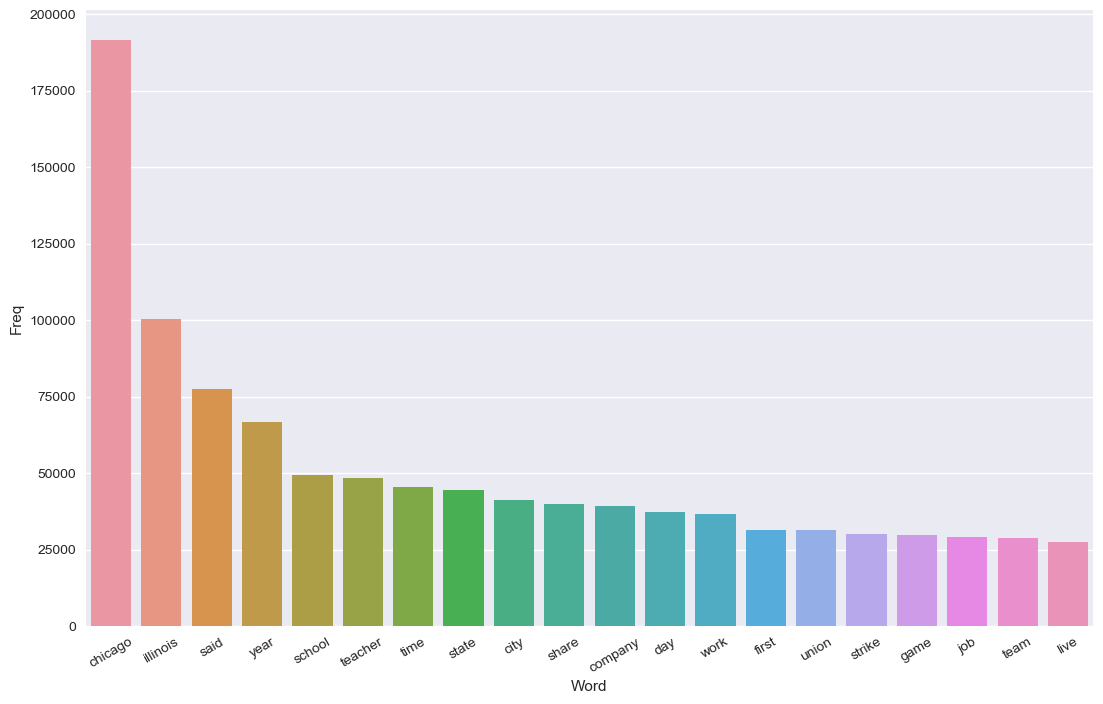

In [73]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(data['text_clean'], n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

Plotting word distribution:

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
<string>:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


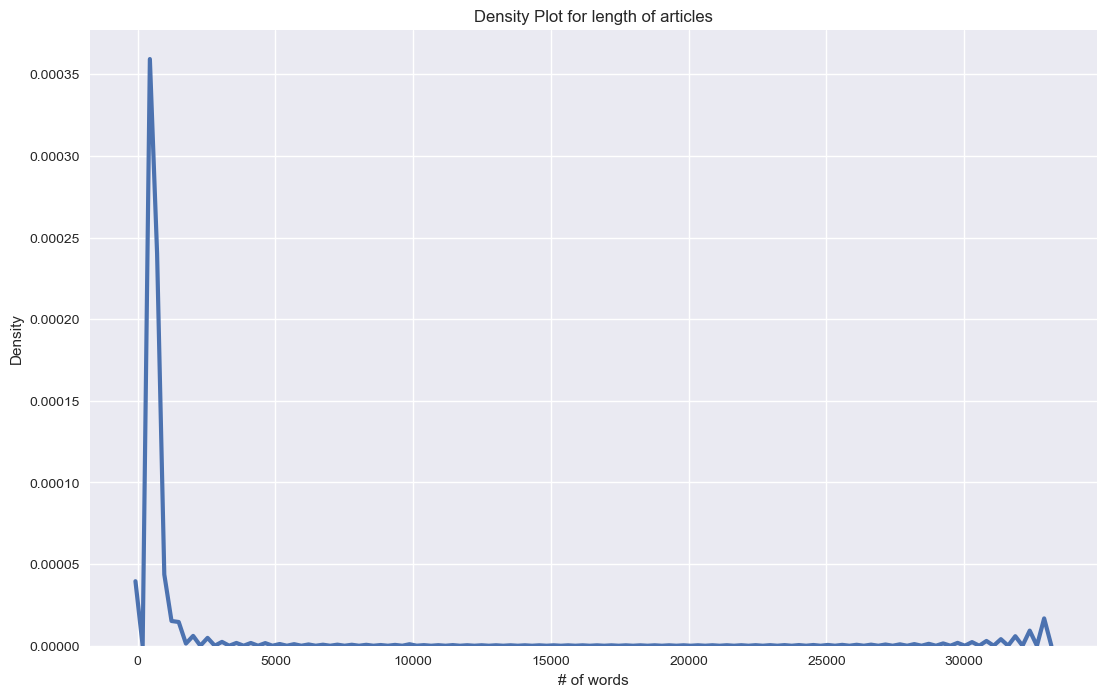

In [74]:
sns.distplot(data['totalwords'], hist = False, kde = True, kde_kws = {'linewidth': 3})
plt.title('Density Plot for length of articles')
plt.xlabel('# of words')
plt.ylabel('Density')
plt.show()

The distriution of words is right-skewed. Having too many words generally does not seem to be an issue for our purpose though. What is an issue, however, are too few words. I am therefore trying to identify articles that consist only of a handful of words.

In [75]:
data['totalwords'].sort_values(ascending=True).head(100)

33853    1
6659     1
17690    2
17952    2
33133    2
        ..
26744    5
8818     5
12449    5
26189    5
22178    5
Name: totalwords, Length: 100, dtype: int64

In [76]:
data.iloc[[33853, 6659, 33133, 26744, 22178]]

crawled_date language                     text  \
33853   2019-10-20  english                            
6659    2019-11-05  english                  Chicago   
33133   2019-10-20  english   24 - 23 over Wisconsin   
26744   2019-10-15  english           Single Parents   
22178   2019-10-11  english  Decline Nicky Delmonico   

                                                   title  \
33853                                            Chicago   
6659                                             Chicago   
33133                                      Illinois wins   
26744  Besides One Chicago, what are you watching?? #...   
22178                                  Chicago White Sox   

                                                combined  \
33853                                            Chicago   
6659                                      ChicagoChicago   
33133                24 - 23 over WisconsinIllinois wins   
26744  Single ParentsBesides One Chicago, what are yo...   
22178           Decline Nicky DelmonicoChicago White Sox   

                                        text_clean  totalwords  \
33853                                      chicago           1   
6659                                chicagochicago           1   
33133                        wisconsinillinois win           2   
26744  single parentsbesides chicago watching page           5   
22178     decline nicky delmonicochicago white sox           5   

                                         sentences_clean  \
33853  [swarming, illinois, defense, lead, win, rutge...   
6659   [swarming, illinois, defense, lead, win, rutge...   
33133  [swarming, illinois, defense, lead, win, rutge...   
26744  [swarming, illinois, defense, lead, win, rutge...   
22178  [swarming, illinois, defense, lead, win, rutge...   

                                             word_tokens  
33853                                          [chicago]  
6659                                    [chicagochicago]  
33133                           [wisconsinillinois, win]  
26744  [single, parentsbesides, chicago, watching, page]  
22178     [decline, nicky, delmonicochicago, white, sox]

It seems like articles with few words are either just the title of a section (e.g., 6659) or contain a link (e.g., 37542, 20323, 2205). These kind of articles do not help for our purpose. In the following, I am taking a look at the whole distribution. Based on that, I will set a threshold for a minimum number of words articles should contain to be considered relevant.

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
<string>:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


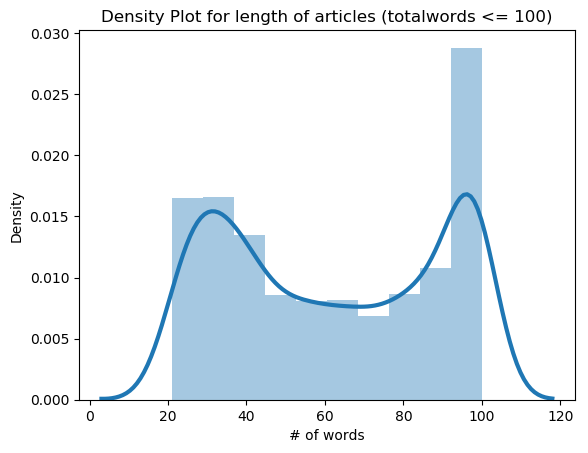

In [900]:
sns.distplot(data[data['totalwords']<=100]['totalwords'], hist = True, kde = True, kde_kws = {'linewidth': 3})
plt.title('Density Plot for length of articles (totalwords <= 100)')
plt.xlabel('# of words')
plt.ylabel('Density')
plt.show()

In [79]:
print(round(len(data[data['totalwords']<=150]['totalwords'])/len(data['totalwords']), 4))
print(round(len(data[data['totalwords']<=100]['totalwords'])/len(data['totalwords']), 4))
print(round(len(data[data['totalwords']<=20]['totalwords'])/len(data['totalwords']), 4))

0.5008
0.3995
0.1014


Almost 38% of the articles consist of 100 or less words and about 11% count 20 or less words. About 50% of the articles contain 150 words or less (that is approximately the length of a tweet on twitter!). Based on this, I am taking a more conservative approach and drop all articles that consist of 20 words or less, as these will most likely not have in depth information.

In [89]:
data = data.drop(data[data['totalwords']<=20].index)

# 2.) Topic detection (using TF-IDF, LSA, and Truncated SVD)

First, I am creating a numerical representation of each article. To do so, I am using TFIDF, which converts a collection of raw documents to a matrix of TFIDF features. It is equivalent to CountVectorizer followed by TfidfTransformer.<br>

TFIDF is a more reliable metric than plain frequency because it normalizes frequency across documents. Very common and semantically meaningless words like articles, prepositions, etc. that have not already been removed by deleting all stopwords are in this way given less weight and filtered out.

In [90]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(data['text_clean'])

The TFIDF word vectors are very sparse and high dimensional, due to the number of different words that comes with a large corpus of articles. For better processing, I am applying Singular Value Decomposition (SVD) as a method of dimension reduction. When truncated SVD is applied to a term-document matrix, this transformation is known as Latent Semantic Analysis (LSA), because it transforms such matrices to a semantic space of low dimensionality. Here it is important to find a tradeoff between explained variance and dimensionality.

In [95]:
svd = TruncatedSVD(n_components = 1500)

# Since LSA/SVD results are not normalized, we have to redo the normalization
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

tfidf_lsa = lsa.fit_transform(tfidf)

print("Explained variance of the SVD step: {}%".format(int(svd.explained_variance_ratio_.sum() * 100)))

Explained variance of the SVD step: 59%


In the next step, I am calculating the average within clusters sum of squares for a range of different clusters (that I defined to be between 2 and 20). I am then plotting the average wcss per cluster and try to derive the optimal number of clusters ('elbow method').

In [96]:
k_range = range(2,21)
kms = [KMeans(n_clusters=k, init='k-means++').fit(tfidf_lsa) for k in k_range]
centroids = [X.cluster_centers_ for X in kms]
labels = [km.labels_ for km in kms]

#calculate Euclidean distance from each point to cluster center
k_euclid = [cdist(tfidf_lsa, c, 'euclidean') for c in centroids] 
dist = [np.min(ke, axis=1) for ke in k_euclid]

#Total within cluster sum of squares
wcss = [sum(d**2) for d in dist]

#average wcss
avwcss = [(sum(d**2))/len(d) for d in dist]

#total sum of squares
#tss = sum(pdist(tfidf_lsa)**2)/tfidf_lsa.shape[0]

#between cluster sum of squares:
#bss = tss - wcss

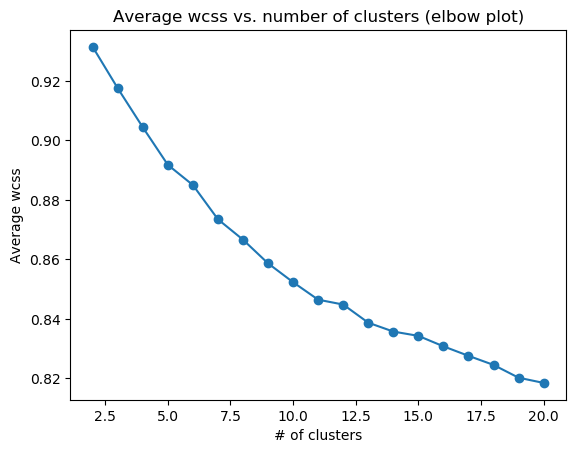

In [898]:
#plot average wcss vs number of clusters "Elbow plot"
plt.plot(k_range, avwcss, '-o')
plt.title('Average wcss vs. number of clusters (elbow plot)')
plt.ylabel("Average wcss")
plt.xlabel("# of clusters")
plt.show()

Unfortunately, the plot does not display a point of rapid change. Another option is to look at the average silhouette score per cluster. The silhouette score displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1], 1 being the furthest away (ideal), and -1 being the closest (not ideal).

In [99]:
silhouette_avg_scores = [silhouette_score (tfidf_lsa, l, sample_size = 10000, metric='euclidean') for l in labels]

In [103]:
silhouette_avg_scores.index(max(silhouette_avg_scores))

14

Based on the average silhouette scores, 15 clusters (0-14) seems to be the optimum number.

In [108]:
k = 15
#these are all default options (except for k)
km = KMeans(algorithm='auto',
            copy_x=True,
            init='k-means++',
            max_iter=300,
            n_clusters=k,
            n_init=10,
            n_jobs=1,
            precompute_distances='auto',
            random_state=None,
            tol=0.0001,
            verbose=0)

In [109]:
km.fit(tfidf_lsa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [110]:
clusters = km.labels_
k_centers = km.cluster_centers_ #Coordinates of cluster centers  [n_clusters, n_features]
original_space_centroids = svd.inverse_transform(k_centers)
order_centroids = original_space_centroids.argsort()[:, ::-1] #argsort returns the indices that would sort an array

Assigning cluster labels from Kmeans to respective articles:

In [115]:
data['label_km'] = clusters
data.head()

crawled_date language                                               text  \
0   2019-10-31  english  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1   2019-10-31  english  Chicago's teachers union voted to approve a te...   
2   2019-10-31  english  News KnowThis: Trump vs. Chicago & Relentless ...   
3   2019-10-31  english  You may have noticed that markets are taking a...   
4   2019-10-31  english  Anxious students feeling pinch amid Chicago te...   

                                               title  \
0  Police say Illinois man targeted, killed in ea...   
1  Chicago teachers strike continues with tentati...   
2  KnowThis: Trump vs. Chicago & Relentless Fires...   
3  Jim Cramer Explains Why Markets Tanked on Weak...   
4  Anxious students feeling pinch amid Chicago te...   

                                            combined  \
0  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1  Chicago's teachers union voted to approve a te...   
2  News KnowThis: Trump vs. Chicago & Relentless ...   
3  You may have noticed that markets are taking a...   
4  Anxious students feeling pinch amid Chicago te...   

                                          text_clean  totalwords  \
0  news october st ric hanson cedar rapid iowa ap...          70   
1  chicago teacher union voted approve tentative ...         342   
2  news knowthis trump v chicago relentless fire ...         899   
3  may noticed market taking beating dow plunged ...          65   
4  anxious student feeling pinch amid chicago tea...         174   

                                         word_tokens  label_km  
0  [news, october, st, ric, hanson, cedar, rapid,...         5  
1  [chicago, teacher, union, voted, approve, tent...         3  
2  [news, knowthis, trump, v, chicago, relentless...         0  
3  [may, noticed, market, taking, beating, dow, p...        13  
4  [anxious, student, feeling, pinch, amid, chica...         3

After assigning the labels to each article, I am extracting the keywords for each cluster to see what it is about. 

In [159]:
n_cluster = range(len(data['label_km'].unique()))
cv = CountVectorizer(max_df=0.8,stop_words='english', max_features=10000, ngram_range=(1,3))
word_vector = [cv.fit_transform(data[data['label_km']==n]['text_clean']) for n in n_cluster]


#cv = CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
#word_vector = cv.fit_transform(data['text_clean_joined'])

In [118]:
tf_idf_vector = []
feature_names = []
docs = []

for n in n_cluster:
    cv=CountVectorizer(max_df=0.8,stop_words='english', max_features=10000, ngram_range=(1,3))
    X=cv.fit_transform(data[data['label_km']==n]['text_clean'])

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)
    
    # get feature names
    feature_names.append(cv.get_feature_names())
 
    # fetch document for which keywords needs to be extracted
    doc = ' '.join(data[data['label_km']==n]['text_clean'])
    docs.append(' '.join(data[data['label_km']==n]['text_clean']))
 
    #generate tf-idf for the given document
    tf_idf_vector.append(tfidf_transformer.transform(cv.transform([doc])))

In [119]:
#Function for sorting tf_idf in descending order
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [120]:
keywords = []

for n in n_cluster:

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector[n].tocoo())

    #extract only the top n; n here is 15
    keywords.append(extract_topn_from_vector(feature_names[n], sorted_items, 15))

In [121]:
keywords

[{'chicago police': 0.081,
  'chief': 0.092,
  'city': 0.233,
  'conference': 0.079,
  'crime': 0.089,
  'gun': 0.071,
  'johnson': 0.186,
  'law': 0.071,
  'officer': 0.075,
  'people': 0.091,
  'said': 0.217,
  'speech': 0.073,
  'superintendent': 0.071,
  'trump said': 0.08,
  'year': 0.082},
 {'ability': 0.09,
  'business': 0.147,
  'chicago il': 0.083,
  'client': 0.142,
  'customer': 0.098,
  'data': 0.107,
  'development': 0.088,
  'management': 0.107,
  'manager': 0.085,
  'product': 0.086,
  'project': 0.109,
  'sale': 0.098,
  'service': 0.109,
  'team': 0.125,
  'technology': 0.084},
 {'chicago': 0.171,
  'chicago illinois': 0.117,
  'construction': 0.126,
  'home': 0.236,
  'home sale': 0.147,
  'illinois november': 0.112,
  'model': 0.221,
  'model marco': 0.221,
  'model marco amidei': 0.221,
  'november': 0.115,
  'park': 0.106,
  'school': 0.137,
  'view': 0.252,
  'view model': 0.221,
  'view model marco': 0.221},
 {'city': 0.16,
  'contract': 0.105,
  'cps': 0.081,
  

Creating word clouds for all clusters:

In [ ]:
corpus = []
for i in list(data.index):
    
    #Convert to lowercase
    text = data['combined'][i].lower()
    
    #Tokenize sentences
    sentences = sent_tokenize(text)
    
    corpus.append(sentences)

In [ ]:
data['sentences'] = corpus
data['sentences_joined'] = [' '.join(data['sentences'][i]) for i in list(data.index)]
data.head()

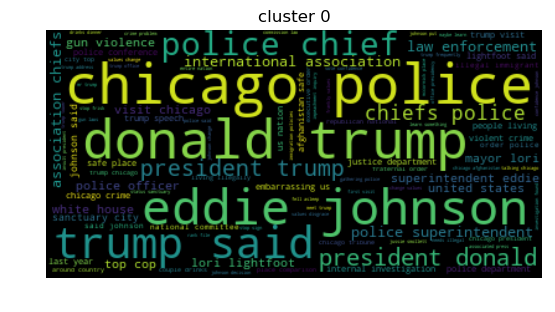

In [221]:
# Start with one review:
text = ' '.join(data[data['label_km']==0]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 0')
plt.show()

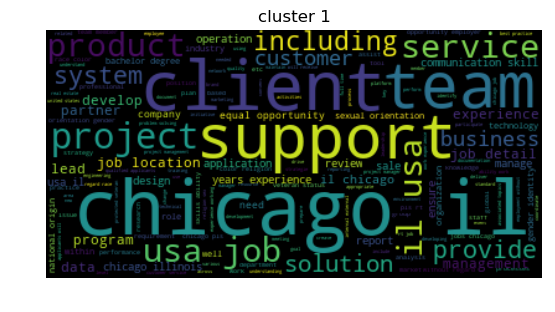

In [222]:
# Start with one review:
text = ' '.join(data[data['label_km']==1]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 1')
plt.show()

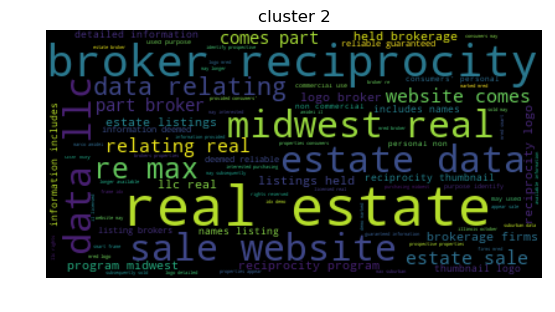

In [223]:
# Start with one review:
text = ' '.join(data[data['label_km']==2]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 2')
plt.show()

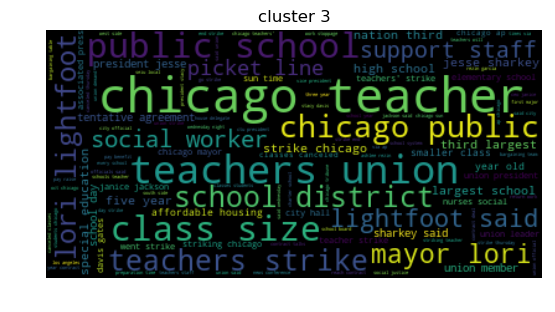

In [224]:
# Start with one review:
text = ' '.join(data[data['label_km']==3]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 3')
plt.show()

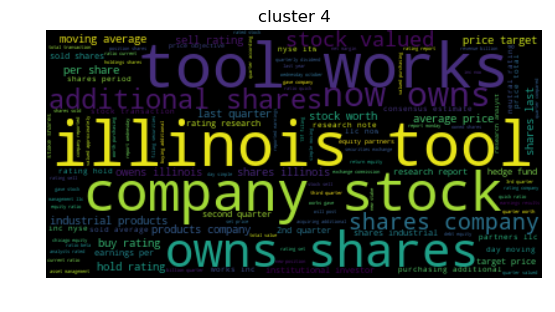

In [225]:
# Start with one review:
text = ' '.join(data[data['label_km']==4]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 4')
plt.show()

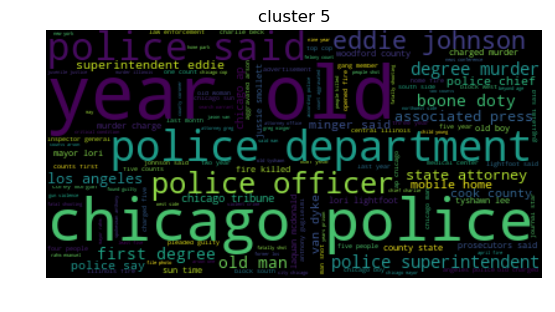

In [226]:
# Start with one review:
text = ' '.join(data[data['label_km']==5]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 5')
plt.show()

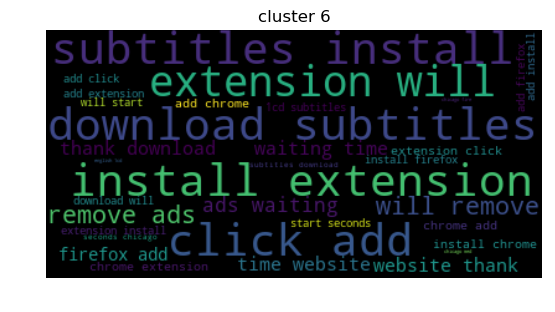

In [227]:
# Start with one review:
text = ' '.join(data[data['label_km']==6]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 6')
plt.show()

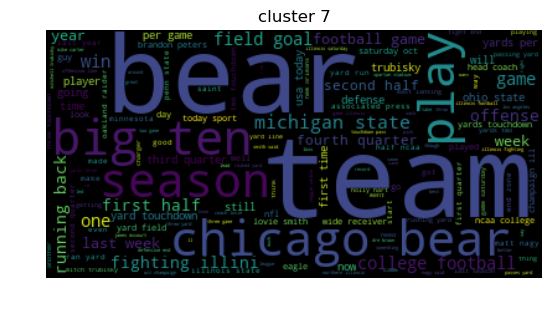

In [228]:
# Start with one review:
text = ' '.join(data[data['label_km']==7]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 7')
plt.show()

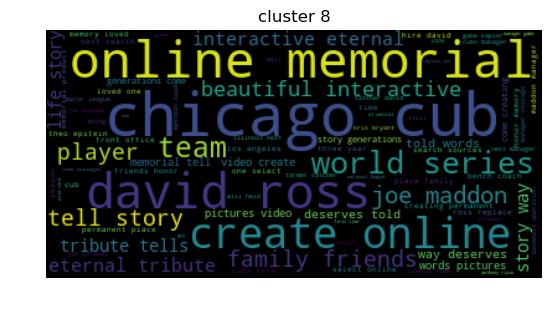

In [229]:
# Start with one review:
text = ' '.join(data[data['label_km']==8]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 8')
plt.show()

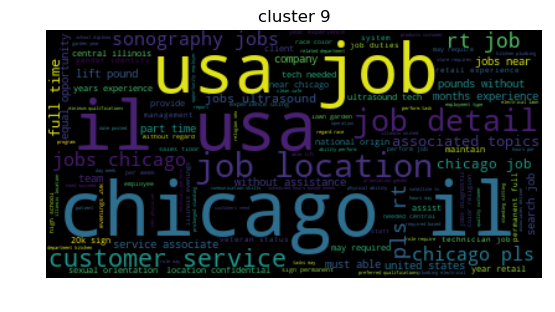

In [230]:
# Start with one review:
text = ' '.join(data[data['label_km']==9]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 9')
plt.show()

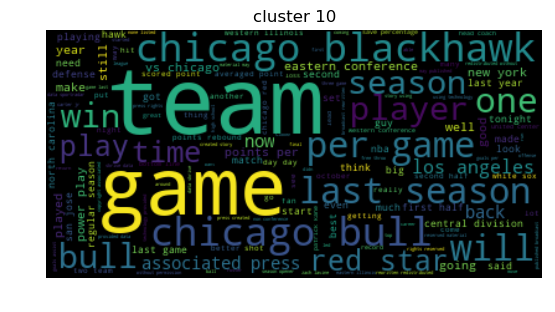

In [231]:
# Start with one review:
text = ' '.join(data[data['label_km']==10]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 10')
plt.show()

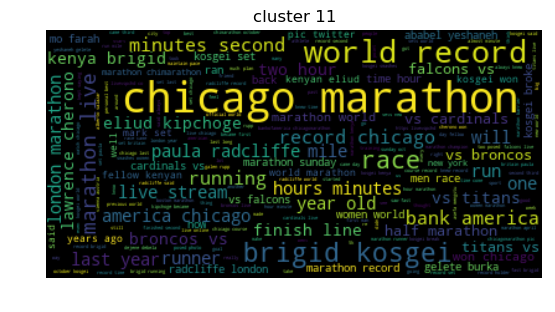

In [232]:
# Start with one review:
text = ' '.join(data[data['label_km']==11]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 11')
plt.show()

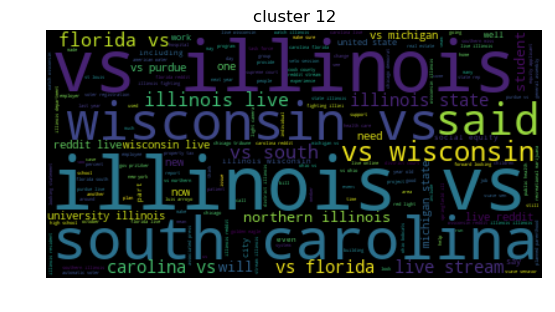

In [233]:
# Start with one review:
text = ' '.join(data[data['label_km']==12]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 12')
plt.show()

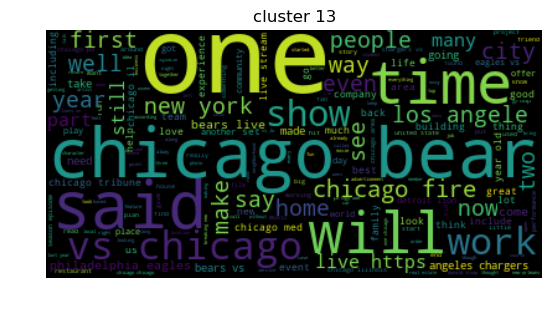

In [234]:
# Start with one review:
text = ' '.join(data[data['label_km']==13]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 13')
plt.show()

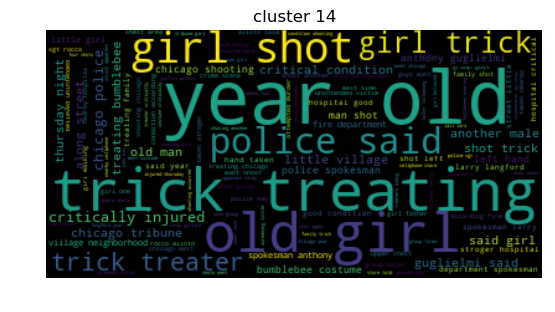

In [235]:
# Start with one review:
text = ' '.join(data[data['label_km']==14]['sentences_joined'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('cluster 14')
plt.show()

Based on the word clouds, about half of the clusters do not seem to actually cover any topics relevant to the problem at hand. I am hand-labeling the clusters as follows:<br>

**Not relevant**<br>
- 6: URLs/Advertisement
- 7: Football
- 8: Baseball
- 10: Ice hockey/basketball
- 11: Chicago marathon
- 12: College sport
- 13: Sport in general (soccer and the like)

**Relevant**
- 0: Politics
- 1: government support
- 2: real estate
- 3: education
- 4: financials/companies
- 5: police
- 9: jobs
- 14: crime

Subsequently, I will drop all non-relevant clusters.

In [237]:
non_relevant = [6,7,8,10,11,12,13]

In [261]:
for i in non_relevant:
    data = data.drop(data[data['label_km']==i].index)

In [262]:
data['label_km'].unique()

array([ 5,  3,  0,  4, 14,  1,  2,  9])

# 3.) Sentiment analysis

## 3.1) Using word2vec to find similarity between articles and keywords 'population' and 'decline'

In [264]:
data.head()

crawled_date language                                               text  \
0   2019-10-31  english  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1   2019-10-31  english  Chicago's teachers union voted to approve a te...   
2   2019-10-31  english  News KnowThis: Trump vs. Chicago & Relentless ...   
4   2019-10-31  english  Anxious students feeling pinch amid Chicago te...   
6   2019-10-31  english  Chicago teachers have approved a tentative agr...   

                                               title  \
0  Police say Illinois man targeted, killed in ea...   
1  Chicago teachers strike continues with tentati...   
2  KnowThis: Trump vs. Chicago & Relentless Fires...   
4  Anxious students feeling pinch amid Chicago te...   
6  Chicago Teachers’ Strike: Highlights Of The Te...   

                                            combined  \
0  News October 31st, 2019 by Ric Hanson\nCEDAR R...   
1  Chicago's teachers union voted to approve a te...   
2  News KnowThis: Trump vs. Chicago & Relentless ...   
4  Anxious students feeling pinch amid Chicago te...   
6  Chicago teachers have approved a tentative agr...   

                                          text_clean  totalwords  \
0  news october st ric hanson cedar rapid iowa ap...          70   
1  chicago teacher union voted approve tentative ...         342   
2  news knowthis trump v chicago relentless fire ...         899   
4  anxious student feeling pinch amid chicago tea...         174   
6  chicago teacher approved tentative agreement r...         149   

                                         word_tokens  label_km  \
0  [news, october, st, ric, hanson, cedar, rapid,...         5   
1  [chicago, teacher, union, voted, approve, tent...         3   
2  [news, knowthis, trump, v, chicago, relentless...         0   
4  [anxious, student, feeling, pinch, amid, chica...         3   
6  [chicago, teacher, approved, tentative, agreem...         3   

                                           sentences  \
0  [news october 31st, 2019 by ric hanson\ncedar ...   
1  [chicago's teachers union voted to approve a t...   
2  [news knowthis: trump vs. chicago & relentless...   
4  [anxious students feeling pinch amid chicago t...   
6  [chicago teachers have approved a tentative ag...   

                                    sentences_joined  
0  news october 31st, 2019 by ric hanson\ncedar r...  
1  chicago's teachers union voted to approve a te...  
2  news knowthis: trump vs. chicago & relentless ...  
4  anxious students feeling pinch amid chicago te...  
6  chicago teachers have approved a tentative agr...

Utilizing Google pre-trained word2vec model:

In [152]:
model = gensim.models.KeyedVectors.load_word2vec_format ('GoogleNews-vectors-negative300.bin.gz', binary=True) 

**Search engine**

Writing function that ceates embeddings, averages vectors for each document, calculates similarity to query words and ranks them in descending order.

In [265]:
def rank_documents(query, corpus, n_ranks = 10):

    # Function to get the embedding vector for n dimension, I have used 300
    def get_embedding(word):    
        if word in model.wv.vocab:        
            return model[word]    
        else:        
            return np.zeros(300)
    
    sens = []
    for sen in corpus:
        sens.append(sen)
    
    # Getting average vector for each document 
    out_dict =  {} 
    for sen in corpus:     
        average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(sen)]), axis=0))
        dict = { sen : (average_vector) }    
        out_dict.update(dict)

    # Function to calculate the similarity between the query vector and document vector
    def get_sim(query_embedding, average_vector_doc):     
        sim = [(1 - distance.cosine(query_embedding, average_vector_doc))]    
        return sim
    # Rank all the documents based on the similarity to get relevant docs   
    query_words =  (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())],dtype=float), axis=0))    
    rank = []    
    for k,v in out_dict.items():        
        rank.append((k, get_sim(query_words, v)))    
        rank = sorted(rank,key=lambda t: t[1], reverse=True)    
    return rank[:n_ranks]

In [270]:
relevant_articles = {}
cluster = []
articles = []
similarity = []

for n in data['label_km'].unique():
    article_combined = (rank_documents('population decline', data[data['label_km']==n]['sentences_joined'], n_ranks = 20))
    for i in range(20):
        articles.append(article_combined[i][0])
        similarity.append(article_combined[i][1])
        cluster.append(n)

In [284]:
rel_articles = pd.DataFrame({'cluster': cluster, 'similarity': similarity, 'articles': articles})

In [285]:
rel_articles.head()

cluster             similarity  \
0        5   [0.4353116648417057]   
1        5  [0.42676288163157894]   
2        5  [0.42200757839750214]   
3        5  [0.42040892271343644]   
4        5    [0.417523937932768]   

                                            articles  
0  subscribe to crime trends\nspeaking in chicago...  
1  "in boston, a recent study found that devoting...  
2  subscribe to crime trends\nwill president dona...  
3  the chicago police department must make signif...  
4  chicago spends 40% of its general fund expendi...

In [901]:
len(rel_articles)

160

## 3.2) Sentiment analysis on selected articles

Using dictionaries compiled by the University of Pittsburgh.

In [272]:
pos_sent = open('positive.txt').read()
pos_words = pos_sent.split('\n')
neg_sent = open('negative.txt').read()
neg_words = neg_sent.split('\n')

Tweaking the dictionaries, so that the sentiment is more suited towards the question at hand, namely reasons to move to or from Chicago/Illinois.

In [351]:
# customize the dictionaries by adding and removing your own positive and negative words and get some counts

pos_add = ['attract', 'increase', 'rise', 'allocate', 'open', 'start-up', 'startup', 'founding',
           'investor', 'grow', 'affordable']

for term in pos_add:
    pos_words.append(term)

neg_add = ['decline', 'move', 'leave', 'reduce', 'relocate', 'pricy',
           'expensive', 'low-income', 'poor', 'unemployed', 'murder', 'racism',
           'burglary', 'robbery', 'crime', 'homeless', 'homicide']

for term in neg_add:
    neg_words.append(term)


In [328]:
sentence_list = []

for i in rel_articles['cluster'].unique():
    sentence_list.append(sent_tokenize(' '.join(rel_articles[rel_articles['cluster']==i]['articles'])))

In [352]:
import re
from string import punctuation
from __future__ import division  

sentiment_clusters=[]

for i in sentence_list:
    sentiment_scores = []
    for n in i:
        sentiment_score=0
        for p in list(punctuation):
            sentence=n.replace(p,'')
            words=sentence.split(' ')
        for word in words:
            if word in pos_words:
                sentiment_score=sentiment_score+1
            if word in neg_words:
                sentiment_score=sentiment_score-1
        sentiment_scores.append(sentiment_score/len(words))
    sentiment_clusters.append(sentiment_scores)

sentiment=zip(sentence_list,sentiment_clusters)

In [353]:
# Create a dataframe from the results
column_names = ["Sentence", "Sentiment_Score"]
sentiment_results = [sentence_list, sentiment_clusters]
results_dict = dict(zip(column_names,sentiment_results))
sentiment_df = pd.DataFrame.from_dict(results_dict, orient='columns')
sentiment_df = sentiment_df[column_names]   # set specific column order

In [380]:
labels = []

for i in sentiment_df.index:
    labels.append([str(list(rel_articles['cluster'].unique())[i])]*len(sentiment_df.iloc[i][1]))

sentiment_df['label'] = labels
sentiment_df

Sentence  \
0  [subscribe to crime trends\nspeaking in chicago on monday, president donald trump said, “over th...   
1  [by sara tenenbaum and jonathan fagg chicago (wls) -- the 2019 illinois report card is in, and t...   
2  [trump ‘dead wrong’ about the change in murders in chicago\nreferring to chicago, trump said tha...   
3  [shares of owens-illinois rank the lowest in terms of price to last quarter annualized sales rat...   
4  [the girl, who was not the intended victim, was critically injured "because a group of guys want...   
5  [﻿global cam software market 2019 - 2025 : autodesk, mastercam, solidcam, edgecam, zwsoft, grz s...   
6  [november 01, 2019 07:10 am chicago ridge market trends for october 2019 chicago ridge home sale...   
7  [facebook illinois unemployment rate hits low despite tepid jobs growth illinois’ unemployment r...   

                                                                                       Sentiment_Score  \
0  [-0.027777777777777776, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02631578947368421, -0.05, 0.0, -0.28571428571...   
1  [-0.015873015873015872, 0.0, 0.07792207792207792, 0.06060606060606061, -0.019230769230769232, -0...   
2  [0.0, -0.07142857142857142, 0.1, -0.05, 0.0, 0.0, -0.05, -0.04, -0.05, -0.07142857142857142, 0.0...   
3  [-0.018518518518518517, 0.047619047619047616, 0.0, 0.009345794392523364, 0.0, 0.1578947368421052...   
4  [0.020833333333333332, -0.07692307692307693, 0.07142857142857142, 0.0, 0.043478260869565216, 0.0...   
5  [0.018518518518518517, 0.041666666666666664, 0.03125, 0.0625, 0.0, 0.043478260869565216, -0.0277...   
6  [0.0, 0.0, 0.0, 0.03571428571428571, 0.08, 0.023809523809523808, 0.0, 0.16666666666666666, 0.033...   
7  [-0.1, -0.03225806451612903, -0.06666666666666667, -0.05, 0.0, 0.06666666666666667, 0.0, 0.02564...   

                                                                                                 label  
0  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...  
1  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,...  
4  [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,...  
5  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...  
6  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...  
7  [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,...

In [408]:
sentiment_sent = pd.DataFrame({'label': sentiment_df.iloc[0][2], 'sentence': sentiment_df.iloc[0][0], 'sentiment_score': sentiment_df.iloc[0][1]})

for i in range(1,len(sentiment_df)):
    sentiment_sent = sentiment_sent.append(pd.DataFrame({'label': sentiment_df.iloc[i][2], 'sentence': sentiment_df.iloc[i][0], 'sentiment_score': sentiment_df.iloc[i][1]}))

In [409]:
sentiment_sent.head()

label  \
0     5   
1     5   
2     5   
3     5   
4     5   

                                                                                              sentence  \
0  subscribe to crime trends\nspeaking in chicago on monday, president donald trump said, “over the...   
1  and if we ever took the chicago numbers out of our total numbers, the numbers would be incredibl...   
2                                     his chicago comparison is contradicted by city and federal data.   
3  not only has chicago seen murders fall by significantly more than 10 percent in recent years, it...   
4  chicago has seen 27 percent fewer murders so far this year than it had at this time two years ag...   

   sentiment_score  
0        -0.027778  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000

Creating labels 'positive', 'neutral', and 'negative' from sentiment scores.

In [410]:
# Create a list to store the sentiments
sent_list = []

# For each row in the column,
for row in sentiment_sent['sentiment_score']:
    if row > 0:
        sent_list.append('positive')
    elif row < 0:
        sent_list.append('negative')
    else:
        sent_list.append('neutral')

# Create a column from the list
sentiment_sent['sentiment_label'] = sent_list

In [411]:
sentiment_sent['label'].unique()

array(['5', '3', '0', '4', '14', '1', '2', '9'], dtype=object)

In [412]:
sentiment_sent.drop_duplicates(keep='first',inplace=True) 

Looking at the top 20 positive and top 20 negative conotated sentences.

In [414]:
sentiment_sent.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 100)
sentiment_sent.head(20)

label  \
10      2   
388     4   
235     5   
282     1   
342     1   
82     14   
344     1   
358     1   
322     1   
163    14   
183     9   
328     4   
71      3   
504     4   
262     1   
14      5   
131     9   
151     9   
413     4   
341     1   

                                                                                                sentence  \
10                                                                                  all rights reserved.   
388                         explanation of popular simple moving averages:\nthe 9.49% rising optimistic.   
235                                                                                 all rights reserved.   
282                                      we are content with our glorious 99.9 % client satisfying rate.   
342                      strong commercial acumen – excellent handle on revenue management and forecast.   
82                                                                                it just won’t happen!"   
344                                                                       ability to travel extensively.   
358                                                                   strong analytical skills required.   
322                                                                           interested in this report?   
163                                                                               it just won't happen!"   
183      promote awareness, understanding and serve as role model for wellbeing and healthy masculinity.   
328  the business’s fifty day simple moving average is $167.43 and its 200 day simple moving average ...   
71                                           but one career educator boldly identified the real problem.   
504                       hd is a great business but needs more foreign expansion to grow even stronger.   
262  insights from competitive research analysis will provide a competitive advantage to industries/c...   
14                                                                           that seems kind of obvious.   
131  with this demand for fulfillment talent growing increasingly competitive, radial differentiates ...   
151         comprehensive benefits package and a salary based on mgma plus rvu bonuses will be provided.   
413                   the average true range is a moving average, generally 14 days, of the true ranges.   
341                                                         strong salesforce knowledge and utilization.   

     sentiment_score sentiment_label  
10          0.333333        positive  
388         0.333333        positive  
235         0.333333        positive  
282         0.272727        positive  
342         0.272727        positive  
82          0.250000        positive  
344         0.250000        positive  
358         0.250000        positive  
322         0.250000        positive  
163         0.250000        positive  
183         0.230769        positive  
328         0.222222        positive  
71          0.222222        positive  
504         0.214286        positive  
262         0.210526        positive  
14          0.200000        positive  
131         0.200000        positive  
151         0.200000        positive  
413         0.200000        positive  
341         0.200000        positive

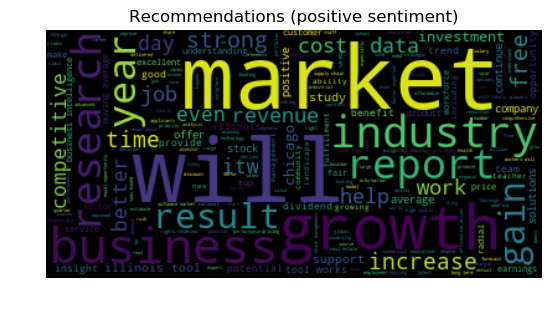

In [884]:
sentiment_sent.sort_values(by='sentiment_score', ascending=False, inplace=True)

# Start with one review:
text = ' '.join(sentiment_sent['sentence'].iloc[:199])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Recommendations (positive sentiment)')
plt.show()

In [415]:
sentiment_sent.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 100)
sentiment_sent.head(20)

label  \
43     14   
277     5   
452     0   
186     5   
296     3   
9       5   
57      0   
196     5   
75      5   
313     5   
415     0   
49      5   
99      5   
92     14   
78      5   
348     3   
218     4   
356     3   
164     4   
180     3   

                                                                                                sentence  \
43                                                                                      tragic re: wtf!?   
277                                                                                  crime has exploded.   
452                                                                                    racism is costly.   
186             decades of harsh policing have left deep wounds of mistrust in neighborhoods of chicago.   
296                                                  ctu’s demands show callous disregard for taxpayers.   
9                                                            “he’s dead wrong on chicago,” grawert said.   
57                                                           “he’s dead wrong on chicago,” grawert said.   
196                                                                          many have criminal records.   
75   naperville’s decrease in violent crime can be attributed to a sharp decline in the number of agg...   
313                             violent crimes encompass homicide, rape, robbery and aggravated assault.   
415                                                                         is johnson lying about that?   
49                                    violent crime totals in chicago grabbed headlines in recent years.   
99                                                                               here's the break down .   
92                                  and that tells me that people are tired of this senseless violence."   
78                         “better use of technology drives the violent crime rate down,” marshall said.   
348                                                                   10. chicago homes have lost value.   
218  poor bottom-line projection: illinois tool’s concerns related to its organic sales had adverse i...   
356                     the windy city has the nation’s worst pension crisis under almost every measure.   
164                         in north america, sales were down 2% while international sales were down 1%.   
180                       high school enrollment was down less than 100, from 73,419 to 73,506 students.   

     sentiment_score sentiment_label  
43         -0.333333        negative  
277        -0.333333        negative  
452        -0.333333        negative  
186        -0.285714        negative  
296        -0.285714        negative  
9          -0.285714        negative  
57         -0.285714        negative  
196        -0.250000        negative  
75         -0.236842        negative  
313        -0.222222        negative  
415        -0.200000        negative  
49         -0.200000        negative  
99         -0.200000        negative  
92         -0.166667        negative  
78         -0.166667        negative  
348        -0.166667        negative  
218        -0.157895        negative  
356        -0.153846        negative  
164        -0.153846        negative  
180        -0.153846        negative

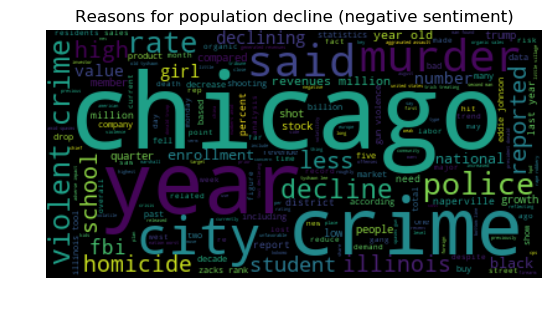

In [895]:
sentiment_sent.sort_values(by='sentiment_score', ascending=True, inplace=True)

# Start with one review:
text = ' '.join(sentiment_sent['sentence'].iloc[:199])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Reasons for population decline (negative sentiment)')
plt.show()

Next, I am looking at the top sentences per cluster:

**cluster 0**

In [422]:
cluster_0 = sentiment_sent[sentiment_sent['label']=='0']

In [426]:
cluster_0.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_0.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
452     0   
57      0   
415     0   
433     0   
29      0   
449     0   
168     0   
160     0   
100     0   
417     0   
428     0   
164     0   
9       0   
1       0   
414     0   
161     0   
11      0   
141     0   
461     0   
111     0   
16      0   
107     0   
15      0   
195     0   
165     0   
106     0   
27      0   
3       0   
6       0   
33      0   

                                                                                                                                                                                                                                                                                                        sentence  \
452                                                                                                                                                                                                                                                                                            racism is costly.   
57                                                                                                                                                                                                                                                                   “he’s dead wrong on chicago,” grawert said.   
415                                                                                                                                                                                                                                                                                 is johnson lying about that?   
433                                                                                   despite chicago's horrible track record of failing to protect the lives of blacks, the police chief of chicago, eddie johnson, boycotted a national police convention in chicago supposedly because of trump's bad values.   
29                                                                                                                                                                        gangs and militia groups attack healthcare facilities, killing a cameroonian doctor working to control the outbreak earlier this year.   
449                                                                                                                                                                                                                                                                 once you have the image, it is hard to lose.   
168                                                                                                                                                                                                                                                         'this is a dark day,' said rep. doug collins (r-ga).   
160                                                                                                                                                                                                                                       'this is an unprecedented cover up,' said rep. mark desaulnier (d-ca).   
100                                                                                                                                                                                                                                             the lawyers said the problem was a reaction to trump’s politics.   
417  maybe rape, muggings and assaults are downsuperintendent of chicago police refuses to meet trump | page 6 despite chicago's horrible track record of failing to protect the lives of blacks, the police chief of chicago, eddie johnson, boycotted a national police convention in chicago supposedly be...   
428                                                                                                                                                           in fact, the police have charged a suspect in only rou

In [436]:
cluster_0.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_0.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
34      0   
194     0   
2       0   
24      0   
47      0   
140     0   
184     0   
281     0   
429     0   
123     0   
182     0   
20      0   
44      0   
284     0   
458     0   
99      0   
95      0   
28      0   
41      0   
71      0   
456     0   
171     0   
119     0   
138     0   
88      0   
10      0   
421     0   
128     0   
432     0   
118     0   

                                                                                                                                                                                                                                                                                                        sentence  \
34                                                                                                                                                                                                           the opposite is true: chicago’s progress has contributed to and even outpaced the national decline.   
194                                                                                                                                                                                                                                                a trump administration proposal could increase those numbers.   
2                                                                                                                                                                                                                                                      that well outpaces the national decline of just under 7%.   
24                                                                                                                                                                                                                                                     russia makes the top 10 list of least peaceful countries.   
47                                                                                                                                                                                                                                                           that’s the year johnson became the city’s top cop .   
140                                                                                                                                                                                                                                           workers will focus on the boeing 737-800 and airbus a321 aircraft.   
184                                                                                                                                                                          earlier this year, the white house predicted those gdp growth numbers would stay at 3 percent or above - but that has not happened.   
281                                                                                                                                                                                                                                    those were ranked as the top 3 winter vacation destinations by wallethub.   
429                                                                                         it's great that trump is willing to point out the fact that while democrats keep saying they care and that they especially care about minorities, their policies result in an amazing level of suffering for blacks.   
123                                                                                                                                                           'i will be making palm beach, florida, our permanent residence,' the president said, moving to a state with no income tax, and no inheritance tax.   
182  federal reserve cuts interest rates as economic growth rate slows hours after new numbers showed economic growth in the third quarter of this year dropping to under two percent in the u.s., the federal reser

**cluster 1**

In [428]:
cluster_1 = sentiment_sent[sentiment_sent['label']=='1']

In [429]:
cluster_1.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_1.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
162     1   
156     1   
150     1   
372     1   
392     1   
80      1   
174     1   
208     1   
173     1   
449     1   
192     1   
62      1   
281     1   
188     1   
51      1   
194     1   
441     1   
195     1   
183     1   
158     1   
6       1   
377     1   
65      1   
243     1   
152     1   
91      1   
236     1   
239     1   
161     1   
228     1   

                                                                                                                                                                                                                                                                                                        sentence  \
162                                                                                                                                                                                                                                                  what are the difficulties hampering the market development?   
156                                                                                                                                                                                                                                  it utilizes swot analysis, porter’s five forces analysis and pest analysis.   
150                                                                                                                                                                                                                              industry segmentation breaks down the key sub-sectors which make up the market.   
372                                                                                                                                                                                                                          in addition, the study team found inequalities in entry-level knowledge and skills.   
392                                                                                                                                                                                                           provides pin-point analysis of inconstant competition dynamics and keeps you ahead of competitors.   
80                                                                                                                                                                                             the report further enfolds import/export consumption, cost, price, revenue, supply and demand, and gross margins.   
174                                                                                                                                                                                                                       currently, only 30% of employees in tech roles are women, and 15% are black or latinx.   
208                                                                                                                                                                                                    the market can be divided based on product types and their sub-type, key applications, and major regions.   
173                                                                                                                                                                                                        in chicago and across the country, employers see a lack of racial and gender diversity in tech roles.   
449                                                                                                                                                      exact and fundamental assessment of robotic process automation advertise division dependent on item/benefit types, applications, areas, and innovation.   
192                                                                                                                                                                          chicago codes is tuition-free, provides

In [435]:
cluster_1.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_1.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
282     1   
342     1   
344     1   
358     1   
322     1   
262     1   
341     1   
63      1   
338     1   
364     1   
21      1   
333     1   
220     1   
451     1   
186     1   
336     1   
394     1   
72      1   
382     1   
334     1   
331     1   
443     1   
359     1   
445     1   
16      1   
347     1   
339     1   
216     1   
395     1   
157     1   

                                                                                                                                                                                                                                                                                                    sentence  \
282                                                                                                                                                                                                                                          we are content with our glorious 99.9 % client satisfying rate.   
342                                                                                                                                                                                                                          strong commercial acumen – excellent handle on revenue management and forecast.   
344                                                                                                                                                                                                                                                                           ability to travel extensively.   
358                                                                                                                                                                                                                                                                       strong analytical skills required.   
322                                                                                                                                                                                                                                                                               interested in this report?   
262                                                                                                                                            insights from competitive research analysis will provide a competitive advantage to industries/clients in the business process management platforms industry.   
341                                                                                                                                                                                                                                                             strong salesforce knowledge and utilization.   
63                                                                                           moreover, this technology adoption provides organizations the capability to accomplish better outcomes from their process with benefits including reduction in costs, improved accuracy, and better compliance.   
338                                                                                                                                                                                       demonstrate political savvy and ability to influence thoughtfully amongst all levels of management at the company.   
364                                                                                                                                                                                                                                                                   rush is an equal opportunity employer.   
21                                                                                                                                                                         it also shares analysis of the competitive landscape, where prominent players and mar

**cluster 2**

In [431]:
cluster_2 = sentiment_sent[sentiment_sent['label']=='2']

In [432]:
cluster_2.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_2.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
94      2   
64      2   
136     2   
73      2   
83      2   
85      2   
84      2   
26      2   
74      2   
27      2   
100     2   
101     2   
99      2   
0       2   
2       2   
137     2   
23      2   
25      2   
22      2   
97      2   
96      2   
103     2   
102     2   
24      2   
63      2   
1       2   
44      2   
54      2   
29      2   
42      2   

                                                                                                                                                                                                                                                              sentence  \
94                                                                    illinois real estate investors need to be aware of recent law changes expanding the definition of “broker.”\nthese new laws expand the definition of what it means to be a “broker” in illinois.   
64                                                                                                                                                                              west lake is located in cary, illinois north of three oaks road and northwest highway.   
136                                                                                                                                                                ballantrae features homes with floor plans ranging from 2,800 to 3,400 square feet of living space.   
73                                                                                                                                                    fox wood estates is surrounded by forest preserve and across from village greens and zigfield troy golf courses.   
83                                                                                                                                                                                                                                         we are experts in the area.   
85                                                                                                                                                                                                                                                      call us today!   
84                                                                                                                                                                                                             we'll sell your home quickly and for the highest price.   
26                                                                                                                                                                                         a newer section is being built starting in 2015 by wilcox communities, llc.   
74                                                                                                                                                                       fox wood estates is located in downers grove, illinois north of 75th and west of lemont road.   
27                                                                                                                                                                              maples at the sonatas is located in woodstock east of route 47 and north of ware road.   
100                                                                                                                                                                                                                  so, how can illinois investors offset its impact?   
101                                                                                                                                   i would recommend active illinois wholesalers (especially those with high volume) find a broker to run deals for a low flat fee.   
99                                                                                                                                            

In [434]:
cluster_2.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_2.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
10      2   
40      2   
7       2   
9       2   
199     2   
30      2   
28      2   
4       2   
53      2   
114     2   
181     2   
31      2   
46      2   
65      2   
138     2   
156     2   
75      2   
174     2   
107     2   
149     2   
167     2   
192     2   
128     2   
86      2   
121     2   
45      2   
39      2   
95      2   
93      2   
98      2   

                                                                                                                                                                                                                                                                                                        sentence  \
10                                                                                                                                                                                                                                                                                          all rights reserved.   
40                                                                                                                                                                                                                                                                     providence is located in elgin, illinois.   
7                                                                                                                                                                                                                                                                information deemed reliable but not guaranteed.   
9                                                                                                                                                                                                                                                                           © 2019 midwest real estate data llc.   
199                                                                                                                                                                                                                                        all rights reserved.195 n. addison, elmhurst, illinois - october 2019   
30                                                                   horton starting in 2019. ponds of bull valley is located in woodstock, illinois off of mcconnell road east of route 47. sanctuary of bull valley\nsanctuary of bull valley is a subdivision of single family homes built in the mid 2010's.   
28                                                                                                                                                                           ponds of bull valley\nponds of bull valley is a single family home subdivision built by deer point homes in the early to mid 2010s.   
4                                                                                                                                                                   the data relating to real estate for sale on this website comes in part from the broker reciprocity program of midwest real estate data llc.   
53                                                                                                                             all rights reserved.new construction homes for sale in elgin, illinois - october 2019 andare at glenloch\nandare at glenloch is an active adult community for those 55 and older.   
114                                                                                                                     all rights reserved.sullivan oaks, wood dale, illinois - october 2019 view all subdivisions in elk grove village marco amidei in an il licensed real estate broker with re/max suburban.   
181                                                                                                                all rights reserved.680 n. milwaukee, river north, chicago, illinois - october 2019 view all subd

**cluster 3**

In [437]:
cluster_3 = sentiment_sent[sentiment_sent['label']=='3']

In [438]:
cluster_3.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_3.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
296     3   
348     3   
356     3   
180     3   
351     3   
354     3   
34      3   
334     3   
458     3   
369     3   
372     3   
183     3   
166     3   
73      3   
505     3   
340     3   
362     3   
337     3   
18      3   
346     3   
339     3   
507     3   
27      3   
470     3   
186     3   
293     3   
191     3   
28      3   
311     3   
32      3   

                                                                                                                                                                                                                                                                           sentence  \
296                                                                                                                                                                                                                             ctu’s demands show callous disregard for taxpayers.   
348                                                                                                                                                                                                                                              10. chicago homes have lost value.   
356                                                                                                                                                                                                the windy city has the nation’s worst pension crisis under almost every measure.   
180                                                                                                                                                                                                  high school enrollment was down less than 100, from 73,419 to 73,506 students.   
351                                                                                                                                                                                                                                 11. chicagoans are drowning in retirement debt.   
354                                                                                                                                                                                                                                     12. chicago is an extreme outlier fiscally.   
34                                                                                                                                                                                 to blame are a declining birth rate, a slowdown in immigration, and population declines overall.   
334                                                                                                                                                                                  here’s how bad things are:\n5. chicago and cps have some of the nation’s worst credit ratings.   
458                                                                                                                                                                                   here’s how bad things are: 5. chicago and cps have some of the nation’s worst credit ratings.   
369                                                                                                                                                                                                                       among elementary schools, 58 have less than 250 students.   
372                                                                                                                                                ten of the elementary schools with low enrollment primarily serve latino students, while the rest serve majority black students.   
183                                                                                                                                                                   the district is also doling out $31 million in equity grants to 219 schools with low o

In [439]:
cluster_3.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_3.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
71      3   
303     3   
330     3   
309     3   
332     3   
271     3   
281     3   
325     3   
305     3   
500     3   
317     3   
290     3   
572     3   
373     3   
331     3   
366     3   
583     3   
288     3   
295     3   
29      3   
316     3   
25      3   
15      3   
359     3   
326     3   
298     3   
2       3   
300     3   
494     3   
36      3   

                                                                                                                                                                                                                                                                                                        sentence  \
71                                                                                                                                                                                                                                                   but one career educator boldly identified the real problem.   
303                                                                                                                                                                                                                          ctu must be willing to accept a contract that is fair and affordable for taxpayers.   
330                                                                                                                                                                                                                                   the average teacher salary will be nearly $100,000 within just five years.   
309                                                                                                                                                                                             over 25,000 teachers and 7,000 support staff will be on strike while 300,000 students will be left in the lurch.   
332                                                                                                                                                                                                                                                               4. the ctu’s demands are even more impossible.   
271                                                                                                                                                                                           the resulting larger class sizes will not affect academic performance and will save taxpayers millions of dollars.   
281                                                                                                                                                                                                                                                       it’s time to lay-off teachers and increase class size.   
325                                                                                                                                                                                              if the union agrees to lightfoot’s contract proposal, that average salary will rise to nearly $100,000 by 2024.   
305                                                                                                                                                                                                                                                      get stories like this delivered straight to your inbox.   
500                                                                                                                                                                                             by that measure the district has done a pretty reasonable job in matching staff reductions to enrollment losses.   
317                                                                                                                                                                                       neither side’s deal will h

**cluster 4**

In [441]:
cluster_4 = sentiment_sent[sentiment_sent['label']=='4']

In [442]:
cluster_4.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_4.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
218     4   
164     4   
214     4   
98      4   
212     4   
162     4   
165     4   
405     4   
82      4   
208     4   
14      4   
222     4   
232     4   
32      4   
15      4   
187     4   
75      4   
9       4   
387     4   
81      4   
77      4   
564     4   
412     4   
378     4   
146     4   
224     4   
215     4   
192     4   
250     4   
402     4   

                                                                                                                                                                                                                                                                                        sentence  \
218                                                                                                                                                    poor bottom-line projection: illinois tool’s concerns related to its organic sales had adverse impacts on the bottom-line projection too.   
164                                                                                                                                                                                                                 in north america, sales were down 2% while international sales were down 1%.   
214                                                                                                                                                                                                it predicts organic sales to decline 1-3%, down from growth of 0.5-2.5% mentioned previously.   
98                                                                                                                                                                                                                                      the company anticipates organic revenue decline of 1-3%.   
212                                                                                                                                                                                                                          its earnings estimates were lowered, reflecting bearish sentiments.   
162                                                                                                                                                                                               on a same-day basis, organic sales were down 3.2% versus a 2.8% decline in the second quarter.   
165                                                                                                                                                                                                                                                     europe was down 2% while apac was up 2%.   
405                                                                                                                                                                          volatility is measured by calculating the standard deviation of the annualized returns over a given period of time.   
82                                                                                                                                                                                                                              welding revenues were $402 million, declining 3% year over year.   
208  we believe that the industry is suffering from adverse impacts of global uncertainties, unfavorable movements in foreign currencies, weakness in industrial production in the united states, and cost escalation due to tariffs, commodity inflation, high labor costs and freight charges.   
14                                                                                                                                             food equipment generated revenues of $551 million, declining 2.7% year over year.welding revenues were $402 million, declining 3% year over year.   
222                                                                                             

In [443]:
cluster_4.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_4.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
388     4   
328     4   
504     4   
413     4   
496     4   
102     4   
103     4   
394     4   
5       4   
29      4   
193     4   
177     4   
240     4   
516     4   
78      4   
434     4   
330     4   
166     4   
243     4   
406     4   
482     4   
68      4   
111     4   
197     4   
366     4   
311     4   
148     4   
490     4   
494     4   
71      4   

                                                                                                                                                                                                                                                                                                        sentence  \
388                                                                                                                                                                                                                                 explanation of popular simple moving averages:\nthe 9.49% rising optimistic.   
328                                                                                                                                                                                                  the business’s fifty day simple moving average is $167.43 and its 200 day simple moving average is $164.27.   
504                                                                                                                                                                                                                               hd is a great business but needs more foreign expansion to grow even stronger.   
413                                                                                                                                                                                                                           the average true range is a moving average, generally 14 days, of the true ranges.   
496                                                                                                                                                                     the entry price right now is high, but the yearly gain potential of 6% or better makes itw a fair investment for the long term investor.   
102                                                                                                                                                              the results will likely gain from more than 100 bps of contributions from enterprise initiatives, while price/costs will have positive impacts.   
103                                                                                                                                                                                                                                                  free cash flow will likely be more than 100% of net income.   
394                                                                                                                                                                                                                                                                          its profit margin stands at 17.20%.   
5                                                                                                                                                                                                     we are now looking for when a new uptrend will commence and will alert smartrend subscribers in real time.   
29                                                                                                    the results will likely gain from more than 100 bps of contributions from enterprise initiatives, while price/costs will have positive impacts.free cash flow will likely be more than 100% of net income.   
193                                                                                                                                                                                                                 

**cluster 5**

In [444]:
cluster_5 = sentiment_sent[sentiment_sent['label']=='5']

In [445]:
cluster_5.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_5.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
277     5   
186     5   
9       5   
196     5   
75      5   
313     5   
49      5   
99      5   
78      5   
310     5   
301     5   
316     5   
154     5   
311     5   
183     5   
318     5   
202     5   
200     5   
119     5   
308     5   
94      5   
72      5   
88      5   
278     5   
341     5   
27      5   
309     5   
321     5   
77      5   
198     5   

                                                                                                                                                                                                                                                                                                        sentence  \
277                                                                                                                                                                                                                                                                                          crime has exploded.   
186                                                                                                                                                                                                                     decades of harsh policing have left deep wounds of mistrust in neighborhoods of chicago.   
9                                                                                                                                                                                                                                                                    “he’s dead wrong on chicago,” grawert said.   
196                                                                                                                                                                                                                                                                                  many have criminal records.   
75                                     naperville’s decrease in violent crime can be attributed to a sharp decline in the number of aggravated assault incidents reported in 2018. the report defines violent crimes as the aggregate of offenses involving rape, robbery and murder/non-negligent manslaughter.   
313                                                                                                                                                                                                                                     violent crimes encompass homicide, rape, robbery and aggravated assault.   
49                                                                                                                                                                                                                                            violent crime totals in chicago grabbed headlines in recent years.   
99                                                                                                                                                                                                                                                                                       here's the break down .   
78                                                                                                                                                                                                                                 “better use of technology drives the violent crime rate down,” marshall said.   
310                                                                                                                                 data obtained by the tribune detailing crime levels through august of this year shows the city is not experiencing a crime outburst significantly worse than previous years.   
301                                                                                                                                                                                                                 

In [446]:
cluster_5.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_5.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
235     5   
14      5   
172     5   
297     5   
185     5   
189     5   
105     5   
261     5   
136     5   
109     5   
176     5   
153     5   
193     5   
260     5   
184     5   
338     5   
130     5   
43      5   
339     5   
207     5   
194     5   
46      5   
344     5   
18      5   
284     5   
47      5   
158     5   
292     5   
173     5   
199     5   

                                                                                                                                                                                                                                                                                                        sentence  \
235                                                                                                                                                                                                                                                                                         all rights reserved.   
14                                                                                                                                                                                                                                                                                   that seems kind of obvious.   
172                                                                                                                                                          scott olson/getty images even as chicago faces an $838 million budget deficit, improving public safety and reducing gun violence is a top priority.   
297                                                                                                                                                                                                                          “it’s just starting to kind of become one of those things where – these are rumors.   
185                                                                                                                                                                                                                                                  it starts by rebuilding trust between police and community.   
189                                                                                          improving policing and stopping the flow of illegal guns will require new and better gun laws, a big investment in police training and more support for the police to help them cope with the pressures of the job.   
105                                                                                                                                                                                                                                                      here's even more data from the latest stats available .   
261                                                                                                                                                         police superintendent eddie johnson and mayor lori lightfoot said chicago is setting up a team to help manage and implement the recommended changes.   
136                                                                                                                                                                                                                                     johnson said police had identified a person of interest in the shooting.   
109                                                                                                                                                                    this information could come as a surprise for people because many americans look at the "flyover states" as safe and calm places to live.   
176                                                                                                                                                                 the real cost is even higher when we consider mo

**cluster 9**

In [447]:
cluster_9 = sentiment_sent[sentiment_sent['label']=='9']

In [448]:
cluster_9.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_9.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
150     9   
0       9   
251     9   
65      9   
106     9   
2       9   
50      9   
13      9   
32      9   
102     9   
30      9   
103     9   
9       9   
10      9   
3       9   
64      9   
41      9   
98      9   
190     9   
108     9   
22      9   
39      9   
34      9   
198     9   
1       9   
128     9   
16      9   
79      9   
242     9   
77      9   

                                                                                                                                                                                                                                                                                                        sentence  \
150                                                                                                                                                                                                                                     division includes nutrition services and the diabetic education program.   
0                                                          facebook illinois unemployment rate hits low despite tepid jobs growth illinois’ unemployment rate hit 3.9% in september – the first time in decades that the jobless rate went under 4%, according to data from the u.s. bureau of labor statistics.   
251                                                                                                                                                                                                                             future functions may include other field service and risk management activities.   
65                                                                                                                                                                                                             for most families, being evicted has damaging socioeconomic consequences that perpetuate poverty.   
106                                                                                                                                                                                                                                         “once people move out of a town, they might not move back,” he said.   
2                                                                                                                                                                                                          illinois’ jobless rate has remained higher than the national average but followed the national trend.   
50                                                                                                                a 2017 study from ball state university estimated that, broken down by county, between approximately 50 percent and 60 percent of the jobs in illinois could be at risk of becoming automated.   
13                                                                                                                                                                                                                     the great recession kicked off a decline in illinois’ labor force more than a decade ago.   
32                                                                                                                                                                                        that secular growth, particularly benefiting chicago, has helped cover up some of illinois’ stagnation in other areas.   
102                                                                                                                                                                                                                the labor shortage has more of an impact in downstate illinois than other parts of the state.   
30                                                                                                                                                                                                 however, these po

In [449]:
cluster_9.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_9.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
183     9   
151     9   
131     9   
63      9   
121     9   
181     9   
62      9   
132     9   
238     9   
110     9   
169     9   
152     9   
144     9   
164     9   
97      9   
162     9   
253     9   
29      9   
200     9   
239     9   
166     9   
182     9   
100     9   
174     9   
82      9   
149     9   
168     9   
130     9   
241     9   
37      9   

                                                                                                                                                                                                                                                                                                        sentence  \
183                                                                                                                                                                                                              promote awareness, understanding and serve as role model for wellbeing and healthy masculinity.   
151                                                                                                                                                                                                                 comprehensive benefits package and a salary based on mgma plus rvu bonuses will be provided.   
131                                                                                                                                                with this demand for fulfillment talent growing increasingly competitive, radial differentiates itself through its commitment to a positive work environment.   
63                                                                                                                             lcbh believes that safe, decent and affordable housing is a basic human right, and we aspire to be the preeminent legal resource on housing justice for renters in our community.   
121                                                                                                                                                                                                                                                           advanced degree in community counseling preferred.   
181                                                                                                                                                                                                                          the cwm will be responsible for providing trauma-informed mentorship to male youth.   
62                                                                    lcbh will provide free legal and supportive services to improve housing stability for lower income renters while advocating for the rights of all renters until everyone in chicago has a safe, decent, and affordable place to call home.   
132                                                                               seasonal workers enjoy the benefits of competitive hourly wages, opportunities for overtime, and on-the-job training in a clean and safe work environment where treating workers with respect is radial's number one priority.   
238                                                                                                                                                                                                                           * maintain friendly and helpful attitude at all times when dealing with customers.   
110                                                                                                                                                                                                            this is truly a once-in-a-lifetime opportunity for both participants and researchers.why join us?   
169                                                                                                                                                              we are an equal opportunity employment / affirmativ

**cluster 14**

In [450]:
cluster_14 = sentiment_sent[sentiment_sent['label']=='14']

In [451]:
cluster_14.sort_values(by='sentiment_score', ascending=True, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_14.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
43     14   
92     14   
320    14   
18     14   
391    14   
355    14   
160    14   
139    14   
79     14   
48     14   
346    14   
21     14   
367    14   
61     14   
385    14   
75     14   
137    14   
1      14   
322    14   
319    14   
332    14   
157    14   
311    14   
184    14   
323    14   
314    14   
76     14   
73     14   
38     14   
45     14   

                                                                                                                                                                                                                             sentence  \
43                                                                                                                                                                                                                   tragic re: wtf!?   
92                                                                                                                                                               and that tells me that people are tired of this senseless violence."   
320                                                                                                                                      the 15-year-old shooter intended to murder a member of the latin kings, a rival street gang.   
18                                                                                                                                                                              police say violence is decreasing in the city though.   
391                                  scary stories to tell in the dark (14a)\n<span data-mce-type="bookmark" style="display: inline-block; width: 0px; overflow: hidden; line-height: 0;" class="mce_selres_start">﻿</span>\n101 min.   
355                                                                                                               the girl was trick-or-treating as a group of males chased a man down the street in the little village neighborhood.   
160                                                                                                                                                                              ... there's no place for this savagery in our city."   
139                                                                                                                                                                  "the girl's father was screaming, 'my little girl's been shot.'"   
79                                                                                                                                                                               ... there’s no place for this savagery in our city."   
48                                                                                                                                                                              i am not an opioid addict user id: 72099278 re: wtf!?   
346                                                                                                                                                           overall shootings, however, are down this year compared with last year.   
21                            in december, the city released crime statistics showing that there were fewer murders in 2018 than in 2017, which marked the second year of declining homicides after a surge of violent crime in 2016.   
367                                                                                                        and in the eastern utah community of roosevelt, one man was fatally shot and a second man was stabbed to death at a party.   
61                                                                                                                                                         marijuana use among african americans tends to lead to higher crime rates.   
385                                                                                                      

In [452]:
cluster_14.sort_values(by='sentiment_score', ascending=False, inplace=True)
pd.set_option('display.max_colwidth', 300)
cluster_14.head(30)

/srv/jupyterhub/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


label  \
82     14   
163    14   
189    14   
196    14   
172    14   
91     14   
369    14   
128    14   
78     14   
361    14   
159    14   
93     14   
151    14   
70     14   
22     14   
207    14   
204    14   
324    14   
2      14   
274    14   
305    14   
349    14   
180    14   
317    14   
69     14   
362    14   
134    14   
202    14   
337    14   
350    14   

                                                                                                                                                                                                                                                                                                        sentence  \
82                                                                                                                                                                                                                                                                                        it just won’t happen!"   
163                                                                                                                                                                                                                                                                                       it just won't happen!"   
189                                                                                                                                                                                                                                                                             it just won’t happen!” he wrote.   
196                                                                                                                                                                                                                                 “we’ve had really a great deal of tips come in for this particular incident.   
172                                                                                                                                                                                                                                 "we've had really a great deal of tips come in for this particular incident.   
91                                                                                                                                                                                                                                  "we’ve had really a great deal of tips come in for this particular incident.   
369                                                                                                                                                                                                                                               copyright 2019 nexstar broadcasting, inc. all rights reserved.   
128                                                                                                                                                                             with lots of human help a concerted and sustained conservation campaign is giving a second chance to africa's mountain gorillas.   
78                                                                                                                                                                                        but none of that matters if parents that live in certain communities can’t even taken their children out on halloween.   
361                                                                                                                                                                                                                                             she was in critical but stable condition friday, guglielmi said.   
159                                                                                                                                                                                       but none of that matters i

# 5.) Entity (organizations and people) identification

First, I am doing name entityt recognition using nltk.

In [511]:
entities = []
labels = []

for sent in nltk.sent_tokenize(' '.join(data.iloc[sentiment_sent.index.unique()]['combined'])): 
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)), binary = False): # chunk sentences and apply part of speech tags
        if hasattr(chunk, 'label'):
            entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
            labels.append(chunk.label())

entities_labels = list(zip(entities, labels))
#entities_labels = list(set(zip(entities, labels))) #unique entities

In [512]:
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]
entities_df

Entities        Labels
0      Chicago Bulls Partner With Loud Capital  ORGANIZATION
1                   Launch Venture Competition        PERSON
2                                  SportTechie  ORGANIZATION
3      Chicago Bulls Partner With Loud Capital  ORGANIZATION
4                   Launch Venture Competition        PERSON
...                                        ...           ...
18024                                  Chicago           GPE
18025                                  Chicago  ORGANIZATION
18026                                City Hall      FACILITY
18027                            Jesse Sharkey        PERSON
18028                   Chicago Public Schools        PERSON

[18029 rows x 2 columns]

In a second step, I am filtering only organizations and persons respectively:

In [528]:
organization = []

for n in list(entities_df[entities_df['Labels']=='ORGANIZATION'].index):
    organization.append(entities_df[entities_df['Labels']=='ORGANIZATION']['Entities'][n].lower())

In [529]:
person = []

for n in list(entities_df[entities_df['Labels']=='PERSON'].index):
    person.append(entities_df[entities_df['Labels']=='PERSON']['Entities'][n].lower())

Calculating the respective counts for each entity

In [622]:
organization_df = pd.DataFrame(Counter(organization).most_common(), columns = ['organization','count'])
organization_df.head(10)

organization  count
0  chicago teachers union    270
1                      ap    244
2                     ctu    235
3                    nyse    204
4                     cps    146
5         chicago tribune    143
6          little village    141
7              associated    140
8         fire department    130
9                 chicago    106

In [623]:
person_df = pd.DataFrame(Counter(person).most_common(), columns = ['person','count'])
person_df.head(10)

person  count
0          lightfoot    452
1     lori lightfoot    281
2            sharkey    220
3  anthony guglielmi    146
4      jesse sharkey    141
5   stroger hospital    132
6     larry langford    129
7          lali lara     91
8             alioto     91
9              rocco     87

# 6.) Targeted entity sentiment identification

## 6.1) Organizations

Now, I am taking the most present organizations and persons by word count, extract all sentences in which those are present, and calculate the average sentiment score for these sentences. That way I can get a feeling whether these entities occur in rather negative or rather positive circumstances.

In [735]:
avg_sent_score_org = []
text_org = []
label_max = []

for n in organization_df.index:
    sentences_org = []
    sentences_org = sentiment_sent[sentiment_sent['sentence'].str.contains(organization_df['organization'][n], case=False)==True]
    avg_sent_score_org.append(sentences_org['sentiment_score'].mean())
    text_org.append(list(sentences_org['sentence']))
    label_max.append(max(list(sentences_org['label']),key=list(sentences_org['label']).count, default = 20))
    

In [736]:
organization_df['avg_sent_score'] = avg_sent_score_org
organization_df['sentences'] = text_org
organization_df['label_max'] = label_max
organization_df.head()

organization  count  avg_sent_score  \
0  chicago teachers union    270        0.015044   
1                      ap    244        0.013619   
2                     ctu    235        0.020694   
3                    nyse    204        0.015685   
4                     cps    146       -0.004826   

                                                                                                                                                                                                                                                                                                     sentences  \
0  [meanwhile, chicago teachers union officials blamed the enrollment decline on mayors past and present, and the lack of investment in affordable housing, living wages, working-class neighborhoods and public schools., t he chicago teachers union seems to be marching inexorably toward a strike begi...   
1  [naperville’s decrease in violent crime can be attributed to a sharp decline in the number of aggravated assault incidents reported in 2018. the report defines violent crimes as the aggregate of offenses involving rape, robbery and murder/non-negligent manslaughter., violent crimes encompass hom...   
2  [ctu’s demands show callous disregard for taxpayers., in 2019, however, the district added almost 1,400 employees while ctu lost 507 members., the manufacturer of highly engineered products and specialty systems currently carries a zacks rank #4 (sell)., however, the bottom line suffered from we...   
3  [my long-term investments are stated in my seeking alpha biography.illinois tool works - impressive gains despite macro headwinds - illinois tool works inc. (nyse:itw) illinois tool works inc. ( itw - free report ) seems to have lost its sheen due to weakness in auto production, high debts, fore...   
4  [here’s how bad things are:\n5. chicago and cps have some of the nation’s worst credit ratings., here’s how bad things are: 5. chicago and cps have some of the nation’s worst credit ratings., and cps has a negative $14 billion net position of its own., cps is on the brink of financial collapse, ...   

  label_max  
0         3  
1         1  
2         1  
3         4  
4         3

In [737]:
organization_df[organization_df['label_max']==20]

organization  count  avg_sent_score sentences label_max
14      service employees     60             NaN        []        20
15    international union     60             NaN        []        20
17                   psat     56             NaN        []        20
20        equity partners     48             NaN        []        20
24           sps commerce     43             NaN        []        20
...                   ...    ...             ...       ...       ...
1465  illinois federation      1             NaN        []        20
1466               peoria      1             NaN        []        20
1467           interstate      1             NaN        []        20
1469        spring valley      1             NaN        []        20
1470      woodford county      1             NaN        []        20

[903 rows x 5 columns]

In [742]:
organization_df = organization_df.drop(list(organization_df[organization_df['label_max']==20].index))

In [750]:
organization_df['label_max'] = organization_df['label_max'].astype(str).astype(int)

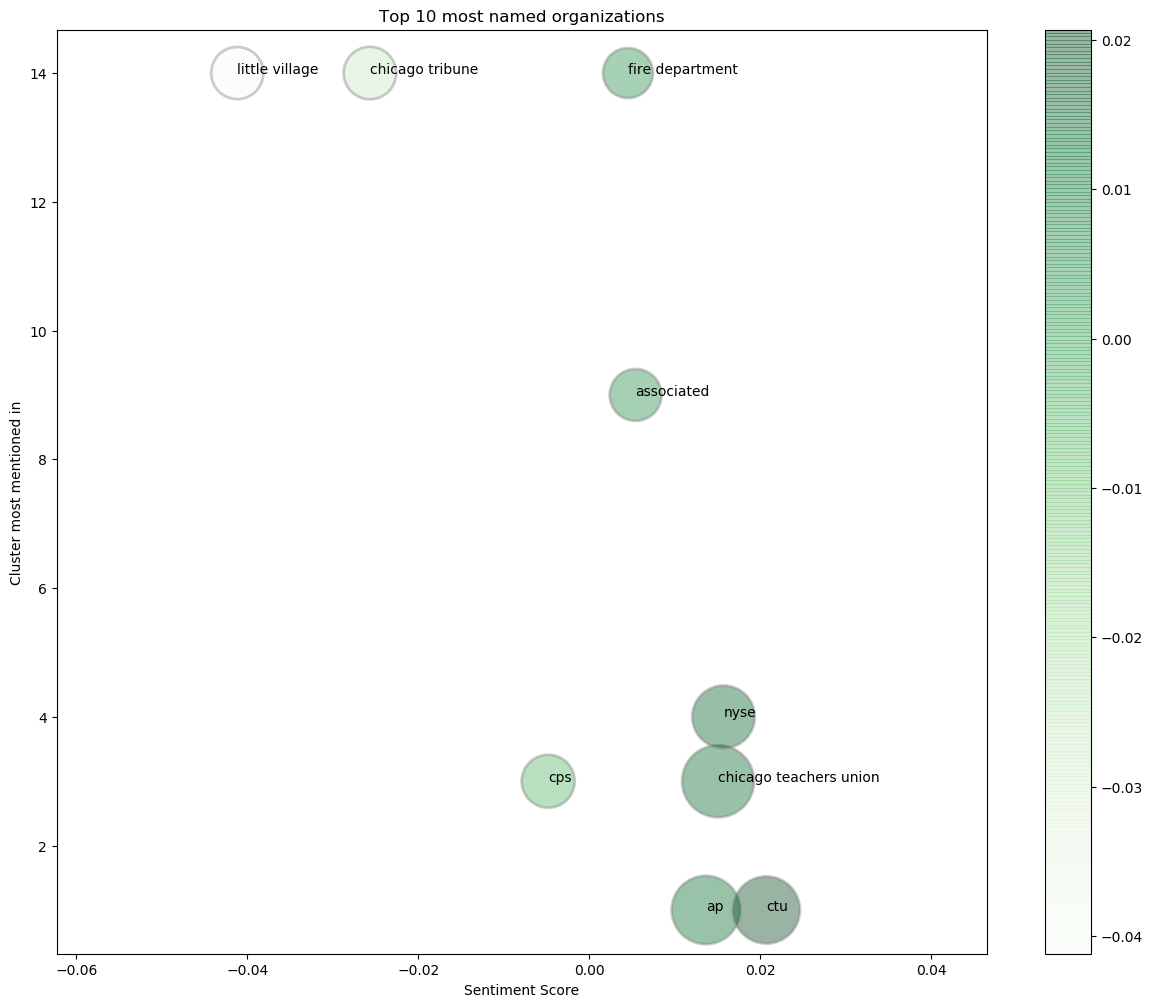

In [809]:
fig, ax = plt.subplots(figsize=(15, 12))
im = ax.scatter(organization_df.iloc[:9]['avg_sent_score'], 
                organization_df.iloc[:9]['label_max'],
                s=organization_df['count'].iloc[0:9]*10, alpha=0.4,
                c=organization_df['avg_sent_score'].iloc[0:9],
                cmap="Greens", edgecolors="grey", linewidth=2)

for i, txt in enumerate(organization_df.organization.iloc[:9]):
    ax.annotate(txt, (organization_df.avg_sent_score.iat[i],organization_df.label_max.iat[i]))

fig.colorbar(im, ax=ax)
plt.title('Top 10 most named organizations')
plt.xlabel('Sentiment Score')
plt.ylabel('Cluster most mentioned in')
plt.show()

In [914]:
text = []

for n in organization_df[organization_df['avg_sent_score']>0].index:
    text = text+organization_df['sentences'][n]

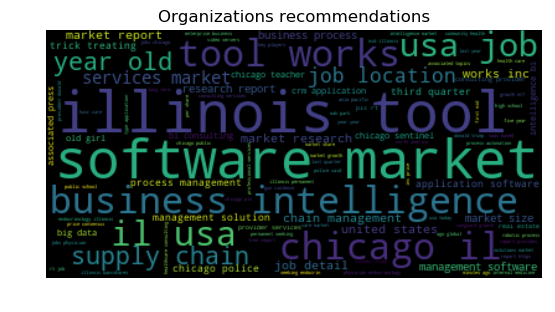

In [915]:

text = ' '.join(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Organizations recommendations')
plt.show()

**Chicagos teacher union**

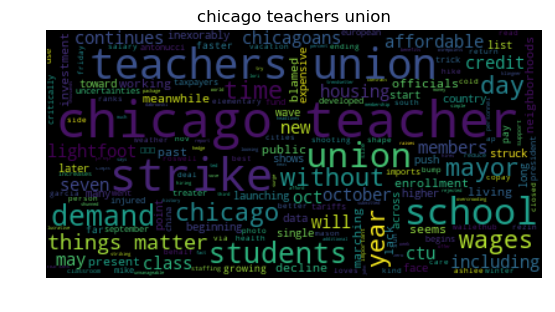

In [824]:
# Start with one review:
text = ' '.join(organization_df['sentences'][0])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[0]['organization'])
plt.show()

Sentences related:

In [826]:
pd.DataFrame(organization_df['sentences'][0])

0
0                                                                                        meanwhile, chicago teachers union officials blamed the enrollment decline on mayors past and present, and the lack of investment in affordable housing, living wages, working-class neighborhoods and public schools.
1                                  t he chicago teachers union seems to be marching inexorably toward a strike beginning oct. 17. the union struck for a single day in 2016 and for seven days in 2012, which many credit as being the launching point for a later wave of teacher strikes across the country.
2                                    chicagoans on oct. 17 face the start of a chicago teachers union strike as the union continues to push for a long, expensive list of demands including higher wages – wages that the data shows have been growing far faster than the pay of the taxpayers who fund them.
3                                                                                                               張貼者：300,000 students without school as chicago teachers strike begins: 13 things that matter by mike antonucci | october 13, 2019 the chicago teachers union went on strike in september 2012.
4  some of those uncertainties have developed over the president's use of tariffs on imports from china, and the european union.trick-or-treater, 7, critically injured in chicago shooting strike-ending deal will shape chicago schools for years photo credit: ashlee rezin garcia/chicago sun-times via...
5                            on behalf of its members, the chicago teachers union (ctu) demands better health care with no copay hike, a salary bump, staffing increases for nurses, and other support personnel, more prep time, and most important, classroom size caps to reduce unmanageable overcrowding.
6  if the chicago teachers union was the trendsetter in strikes, it may try to do the same for a surge in hiring.union report: the looming chicago teacher strike may be as much about membership as it is about money / headlines / world news / 300,000 students without school as chicago teachers strik...
7               the chicago teachers union has rejected what mayor lori lightfoot says is “the most lucrative ctu package in its history.” the union shunned 5-year, 24 percent teacher raises and continues to demand more, including thousands in new hires and additional benefits like affordable housing.
8                                                                                                                                                                                                                                          chicago teachers union members will vote on the contract next week.

**ap**

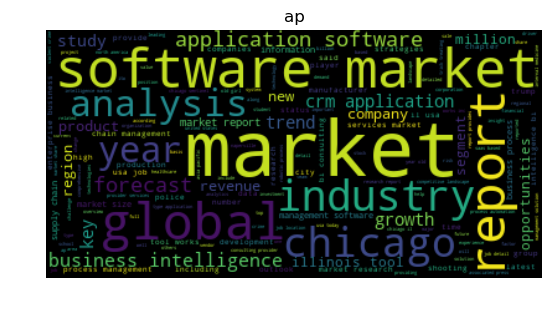

In [827]:
# Start with one review:
text = ' '.join(organization_df['sentences'][1])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[1]['organization'])
plt.show()

Sentences related:

In [828]:
pd.DataFrame(organization_df['sentences'][1])

0
0                                      naperville’s decrease in violent crime can be attributed to a sharp decline in the number of aggravated assault incidents reported in 2018. the report defines violent crimes as the aggregate of offenses involving rape, robbery and murder/non-negligent manslaughter.
1                                                                                                                                                                                                                                       violent crimes encompass homicide, rape, robbery and aggravated assault.
2                                                                                                                                                                                                                                                                       europe was down 2% while apac was up 2%.
3                       latest naperville sun west suburban local scoreboard for sunday, oct. 13, 2019 2hnaperville burglaries up, violent crime down, 2018 fbi crime stats show - chicago tribune \nprez trump is on the warpath against a major american city and the rhetorical battle has a kcmo connection.
4    it is the third most populous city in the united states with 2.7 million residents.chicago police tout declining crime numbers amid spasms of gun violence - cnn the number of burglaries in naperville rose in 2018 while violent crime fell to the second lowest point in five years, fbi crime statis...
..                                                                                                                                                                                                                                                                                                           ...
323                                                                                                                                                                            it also shares analysis of the competitive landscape, where prominent players and market concentration ratio are shed light upon.
324                                                                                                                                                                                                                                                                             it just won’t happen!” he wrote.
325                                                                                              moreover, this technology adoption provides organizations the capability to accomplish better outcomes from their process with benefits including reduction in costs, improved accuracy, and better compliance.
326                                                                                                                                                                                                                                                                                       it just won't happen!"
327                                                                                                                                                                                                                                                                                       it just won’t happen!"

[328 rows x 1 columns]

**ctu**

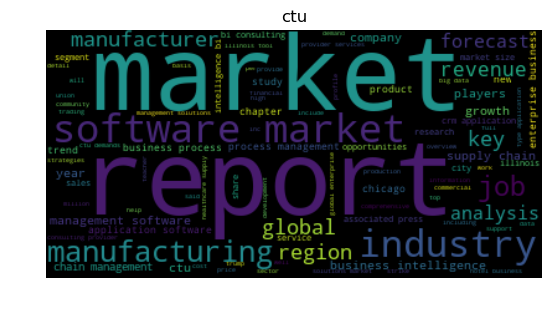

In [928]:
# Start with one review:
text = ' '.join(organization_df['sentences'][2])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[2]['organization'])
plt.show()

Sentences related:

In [832]:
pd.set_option('display.max_rows', 200)
pd.DataFrame(organization_df['sentences'][2])

0
0                                                                                                                                                                                                                                                            ctu’s demands show callous disregard for taxpayers.
1                                                                                                                                                                                                                        in 2019, however, the district added almost 1,400 employees while ctu lost 507 members.
2                                                                                                                                                                                                 the manufacturer of highly engineered products and specialty systems currently carries a zacks rank #4 (sell).
3                                                                                                                                                                                    however, the bottom line suffered from weak revenues, high restructuring expenses, forex woes and divestiture-related loss.
4                                                 source: itw q3/2019 earnings presentation\nfull-year operating margin is expected to be approximately 24% which is down slightly from the previous guidance as a result of higher accelerated restructuring expenses and the impact of slightly lower volumes.
5                                                                                                                                                                                              the largest sector of loss was 1,000 jobs in manufacturing followed by 900 jobs in education and health services.
6                                                                                                                                                                         here are 13 reasons why the strike spells trouble for chicago:\nchicagoans can’t afford either the ctu’s demands or lightfoot’s offer.
7    [most read] video gambling owner pitching racetrack casino is in business with family whose financial ties to mob figures sunk rosemont casino »\nin the united states, property crime decreased 6.3% from 2017 to 2018, with nearly 7.2 million offenses reported in 2018.\nnaperville property crime f...
8                                                                                                                                                                          here are 13 reasons why the strike spells trouble for chicago: chicagoans can’t afford either the ctu’s demands or lightfoot’s offer.
9                                                                                                                                                                 “it’s easier to find new jobs and receive wage increases.”\nthe tight labor market has been a problem for manufacturing companies in illinois.
10    however, the bottom line suffered from weak revenues, high restructuring expenses, forex woes and divestiture-related loss.a glance at the company’s price trend in the past six months shows that it has lost nearly 4% compared with the industry and s&p 500’s declines of 5.8% and 0.3%, respectively.
11                                                                                                                                           since the recession hit bottom nearly a decade ago, illinois has added only 38,000 manufacturing jobs while adding 186,000 professional and business services jobs.
12                                                                                                                                         trump has often railed against chicago, calling it crime-infested because of its sanctuary-city status and as a way to say that the city's gun laws aren't effective.
13   zacks equity research cancel

**nyse**

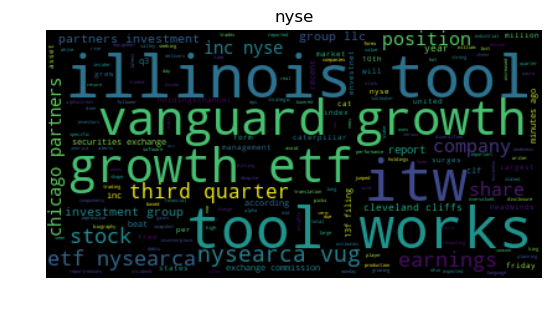

In [833]:
# Start with one review:
text = ' '.join(organization_df['sentences'][3])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[3]['organization'])
plt.show()

Sentences related:

In [834]:
pd.DataFrame(organization_df['sentences'][3])

0
0  my long-term investments are stated in my seeking alpha biography.illinois tool works - impressive gains despite macro headwinds - illinois tool works inc. (nyse:itw) illinois tool works inc. ( itw - free report ) seems to have lost its sheen due to weakness in auto production, high debts, forex...
1  «vanguard growth etf (nysearca:vug) is chicago partners investment group llc’s 10th largest position chicago partners investment group llc grew its position in shares of vanguard growth etf (nysearca:vug) by 1.5% in the third quarter, according to the company in its most recent form 13f filing w...
2                                                                                                                                                                                              get vanguard growth etf alerts: nysearca:vug traded up $0.45 during mid-day trading on monday, hitting $172.47.
3  ohio valley financial group sold 1,075 shares as envestnet asset management inc. has $22.46 million position in caterpillar inc. (nyse:cat) 24 minutes ago\nenvestnet asset management inc. lowered its stake in caterpillar inc. (nyse:cat) by 45.6% in the third quarter, according to the company in ...
4  click to get this free reportreasons why investors should avoid illinois tool stock now chicago partners investment group llc grew its position in shares of vanguard growth etf (nysearca:vug) by 1.5% in the third quarter, according to the company in its most recent form 13f filing with the secur...
5  visit holdingschannel.com to get the latest 13f filings and insider trades for vanguard growth etf (nysearca:vug).chicago partners investment group llc has $18.79 million position in vanguard growth etf (nysearca:vug) shares of illinois tool works ( itw - get report ) jumped friday after a stron...
6  language translation software market report delivers the insights which will shape your strategic planning as you more news in business cleveland-cliffs inc. (nyse:clf) revealing 0.16752 growth year over year 8 minutes ago\ncleveland-cliffs inc. (nyse:clf) have seen a year over year change of sa...
7  become a real-time follower, and you will get each quarter's performance after this earnings season is over .illinois tool works: an overvalued total return, growing income and dividend king investment - illinois tool works inc. (nyse:itw) home / stock picks / hot stocks / illinois tool works ea...
8  the index is a diversified index of growth stocks of large united states companies.vanguard growth etf (nysearca:vug) is chicago partners investment group llc’s 10th largest position chicago partners investment group llc increased its holdings in vanguard growth etf (nysearca:vug) by 1.5% in the...

**cps**

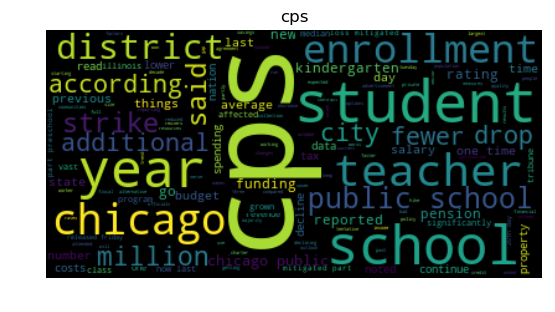

In [835]:
# Start with one review:
text = ' '.join(organization_df['sentences'][4])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[4]['organization'])
plt.show()

Sentences related:

In [836]:
pd.DataFrame(organization_df['sentences'][4])

0
0                                                                                                                                                                                                                here’s how bad things are:\n5. chicago and cps have some of the nation’s worst credit ratings.
1                                                                                                                                                                                                                 here’s how bad things are: 5. chicago and cps have some of the nation’s worst credit ratings.
2                                                                                                                                                                                                                                                   and cps has a negative $14 billion net position of its own.
3                                                                                                                                                                                      cps is on the brink of financial collapse, and its administrators need to bite the bullet and start laying-off teachers.
4                     op-ed: chicago teachers’ strike: historically high immigration makes capping classroom sizes impossible about 6,000 fewer students go to chicago public schools now than last year, but the loss is mitigated in part by more preschool and kindergarten students, according to cps data.
5   [most read] harvest bible chapel elders issue ‘public rebuke’ of fired pastor james macdonald in post that accuses him of bullying and extravagant spending »\nmcdade said there is no correlation between the enrollment changes and the school quality rating policy results that cps also released fr...
6                                                                                                                                                          a separate $250 million property-tax hike by cps to pay for pensions in 2016. numerous fee hikes on garbage collection, utilities, permits and more.
7                                                                                                                                            an $86 million gap was caused by other factors including a recent move by chicago mayor lori lightfoot to shift $61 million in pension costs to cps from the city.
8                                                                                                          school funding for this year won’t decrease because of lower enrollment, and 161 schools with more students than expected are getting more than $13 million in additional funding, according to cps.
9   last year, that number was 361,314.\nadvertisement while the numbers continue to drop, the district noted this year’s decline is “significantly reduced ... compared to the previous three years.”\nlast october, the district reported 10,000 students fewer than the previous school year, when 20th-d...
10  last year, that number was 361,314. advertisement\nwhile the numbers continue to drop, the district noted this year’s decline is “significantly reduced ... compared to the previous three years.”\nlast october, the district reported 10,000 students fewer than the previous school year, when 20th-d...
11                                                                                         (jose m. osorio / chicago tribune) about 6,000 fewer students go to chicago public schools now than last year, but the loss is mitigated in part by more preschool and kindergarten students, according to cps data.
12                                                                     as chicago teachers threaten to walk out, new report suggests a ‘hidden driver’ behind rash of strikes: skyrocketing pension and health costs\nat the time of the 2012 strike, cps employed 41,498 people, of whom 23,290 were teachers.
13         latest breaking newschicago public 

**chicago tribune**

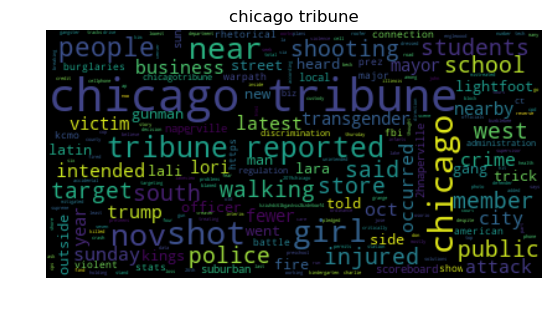

In [837]:
# Start with one review:
text = ' '.join(organization_df['sentences'][5])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[5]['organization'])
plt.show()

Sentences related:

In [838]:
pd.DataFrame(organization_df['sentences'][5])

0
0                      latest naperville sun west suburban local scoreboard for sunday, oct. 13, 2019 2hnaperville burglaries up, violent crime down, 2018 fbi crime stats show - chicago tribune \nprez trump is on the warpath against a major american city and the rhetorical battle has a kcmo connection.
1                                                                                                                                                                                                          the chicago tribune reported the intended target was walking near the girl when the attack occurred.
2                                       | chicago tribune" https://www.chicagotribune.com/business/ct-biz-transgender-discrimination-trump-administration-regulation-20191004-kziuhdc6lbgavksx2bzdn6owf4-story.html[business] - many transgender people don’t seek health care out of fear of being mistreated.
3                                                                                                                                    officials added that the girl was nearby and an “unintended victim.”\nthe chicago tribune reported the intended target was walking near the girl when the attack occurred.
4                                                                                          (jose m. osorio / chicago tribune) about 6,000 fewer students go to chicago public schools now than last year, but the loss is mitigated in part by more preschool and kindergarten students, according to cps data.
5                           the chicago tribune, which tracks the number of shooting victims in the city, said 2,313 people had been shot as of sunday, 223 fewer than in 2018. that is also the lowest total since 2015. mayor lori lightfoot has pledged to find solutions to the problems with gun violence.
6   | chicago tribune trick-or-treater, 7, critically injured in chicago shooting photo credit: john j. kim/chicago tribune via ap a police supervisor and officer stand inside a cell phone store in the 3700 block of west 26th street, where a 7-year-old girl was shot while trick-or-treating thursday,...
7   the man thought to be the target of the shooting, a member of the latin kings gang, was walking near the girl on the street when the gunman fired at least seven shots in his direction.“we heard the shots ... and i went outside,’’ lali lara, 25, who was working at a store near the scene, told the...
8                                                                                                                                                                     "we heard the shots ... four shots, and i went outside," said lali lara, who works in a nearby cellphone store, told the chicago tribune.
9                                                                                                                                                                the chicago tribune reported police believe the gunman is a member of the gangster two-six gang and was targeting a member of the latin kings.
10                                                                                                                                                chicago - tribune - people - chicago - south the chicago tribune reported that 2,313 people were shot in chicago in 2019, mostly on the south and west sides.
11                                                                                                                                                                                                                           the chicago tribune reported that police said the girl was dressed as a bumblebee.
12  latest breaking news infants, cpd officers among those injured in hit-and-run on lake shore drive near south side nov 9, 2019 mayor lori lightfoot tours englewood station tech center with charlie beck, new interim top cop nov 9, 2019 chicago man killed in i-55 crash near la grange road nov 9, 20...

**little village**

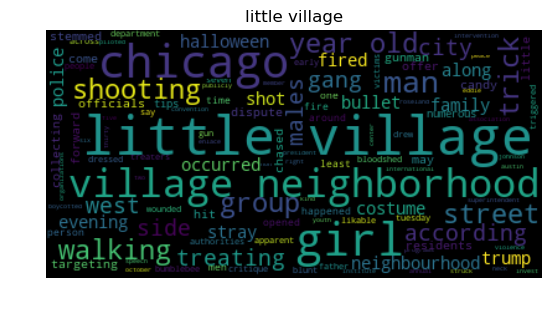

In [839]:
# Start with one review:
text = ' '.join(organization_df['sentences'][6])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[6]['organization'])
plt.show()

Sentences related:

In [840]:
pd.DataFrame(organization_df['sentences'][6])

0
0                                                                                                                                                                                          the girl was trick-or-treating as a group of males chased a man down the street in the little village neighborhood.
1                                                                                                                                          the gunman was not targeting the little girl, who was hit while collecting candy in the little village neighborhood on chicago’s west side, according to officials.
2                                                                                                                                       the shooting may have stemmed from a gang dispute in the little village neighborhood on the city's west side, where residents had come forward to offer numerous tips.
3                                                                            the shooting, which happened around 5:30 p.m. chicago time in the little village neighbourhood, occurred when at least one person in a group of men opened fire on a 31-year-old man, according to the chicago police department.
4                                                                                                                                                                                                   the girl was in a costume and out with her family in the little village neighborhood when she was wounded.
5                                                                                                                                                          the girl, dressed in a bumblebee costume, was walking with her father when was shot by an apparent stray bullet in the little village neighborhood.
6                                                                                                                                         the shooting occurred early halloween evening as the girl was walking with her family and other trick-or-treaters along a street in the little village neighborhood.
7                                                                                                                                         authorities say the man and girl were walking along a street in the little village neighbourhood when a man in a group of males drew a gun and fired at the victims.
8  seven people were shot across chicago on tuesday.chicago’s bloodshed is what triggered trump’s blunt critique of the city’s likable superintendent of police eddie johnson, who publicly boycotted the president’s speech at the annual convention of the international association...trump was right ab...
9                                                                                                             we have to invest in the kind of intervention programs piloted by organizations like the youth peace center in roseland, the institute for non-violence in austin, and enlace in little village.

**associated**

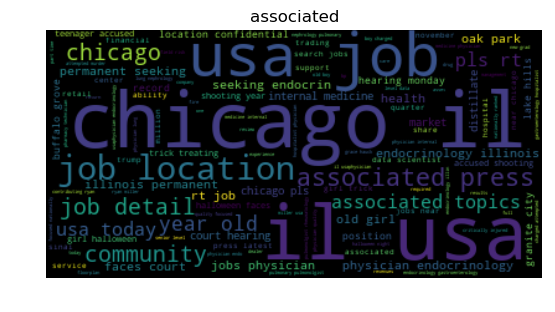

In [841]:
# Start with one review:
text = ' '.join(organization_df['sentences'][7])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[7]['organization'])
plt.show()

Sentences related:

In [843]:
pd.DataFrame(organization_df['sentences'][7])

0
0   plan commission executive director greg sheline responded by calling the notion “a rumor that is so far-fetched it’s unbelievable.”\nsantos salinas, a member of the howard county plan commission sitting in on the city meeting, added an element often used to fight the fear-mongering associated wi...
1   associated topics: americorps, community service, customer service, priest, program, program staff, resource worker, staff, tutor, vocational support/training chicago il usacommunity connector - chicago, il, , usa #jobs #chicago pls rt neonatal icu job description / responsibilities: neonatal in...
2   associated topics: bacteria, disease, drug, drug development, drug discovery, microbiology, pharmaceutical, protein, transfection, virus search for jobs near chicago il usaretail pharmacy technician part-time (howard brown community health center) - chicago, il, , usa #jobs #chicago pls rt job d...
3   contributing: ryan miller, usa today; the associated press\nthis article originally appeared on usa today: halloween shooting in chicago: teen suspect faces court hearingchicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday usa today 3 november 2019\ngrace ...
4   with lots of human help associated press 2:19 the latest: pence recounts planning in runup to is operation associated press 0:59 the latest: trump predicts 'bad things' from doj review associated press 0:57 the latest: trump predicts 'bad things' from doj review associated press 1:50 video shows...
5   contributing: ryan miller, usa today; the associated press\nthis article originally appeared on usa today: chicago teenager accused of shooting 7-year-old girl on halloween faces court hearing mondaychicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday usa ...
6   associated topics: endocrinology, gastroenterology, hospitalist physician, internal medicine, internal medicine physician, lung, nephrology, pulmonary, pulmonolgist, rheumatology lake in the hills il usaphysician / endocrinology / illinois / permanent / seeking an endocrin (lake in the hills) - ...
7                                                                                                                                                                                                                                               (oct. 29) associated press how do you save endangered gorillas?
8   (oct. 29) associated press the latest: pence recounts planning in runup to is operation trump: is group leader killed in us raid in syria associated press 1 cancel settings off hd hq sd lo trick-or-treater, 7, critically injured in chicago shooting associated press see more videos share share tw...
9   contributing: ryan miller, usa today; the associated presschicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday - usa today chicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday grace hauck and jorge l. ortiz, usa toda...
10  contributing: ryan miller, usa today; the associated press chicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday trick-or-treater, 7, critically injured in chicago shooting associated press 9 hrs ago click to expand replay video up next the latest: branch b...
11  contributing: ryan miller, usa today; the associated presschicago teenager accused of shooting 7-year-old girl on halloween faces court hearing monday chicago teen charged in suspected gang shooting that injured girl who was trick-or-treating grace hauck, usa today reblog a 15-year-old boy has b...
12  associated topics: endocrinology, gastroenterology, hospitalist physician, internal medicine, internal medicine physician, lung, nephrology, pulmonary, pulmonolgist, rheumatology oak park il usaphysician / endocrinology / illinois / permanent / seeking an endocrin (oak park) - oak park, il, , us...
13  associated topics: account representative,

**fire department**

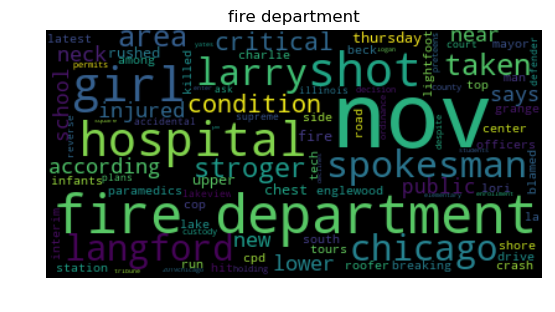

In [844]:
# Start with one review:
text = ' '.join(organization_df['sentences'][8])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[8]['organization'])
plt.show()

Sentences related:

In [845]:
pd.DataFrame(organization_df['sentences'][8])

0
0                                                                                                                                                  the girl, who was shot in the upper chest area, was taken to stroger hospital in critical condition, according to fire department spokesman larry langford.
1                                                                                                                                                                   the girl was shot in the lower neck and rushed to a hospital in critical condition, according to fire department spokesman larry langford.
2                                                                                                                                                             fire department spokesman larry langford says the girl was shot in the lower neck area thursday and was taken by paramedics to stroger hospital.
3  latest breaking news infants, cpd officers among those injured in hit-and-run on lake shore drive near south side nov 9, 2019 mayor lori lightfoot tours englewood station tech center with charlie beck, new interim top cop nov 9, 2019 chicago man killed in i-55 crash near la grange road nov 9, 20...

**chicago**

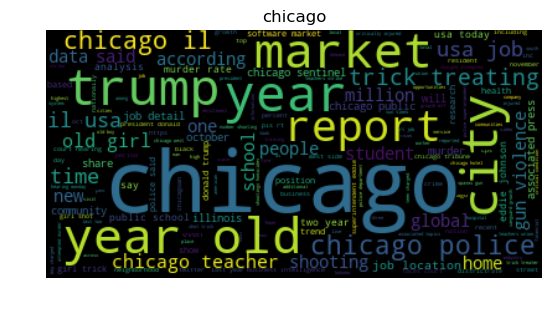

In [846]:
# Start with one review:
text = ' '.join(organization_df['sentences'][9])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(organization_df.iloc[9]['organization'])
plt.show()

Sentences related:

In [847]:
pd.DataFrame(organization_df['sentences'][9])

0
0                                                                                                                                                      decades of harsh policing have left deep wounds of mistrust in neighborhoods of chicago.
1                                                                                                                                                                                                   “he’s dead wrong on chicago,” grawert said.
2                                                                                                                                                                                                   “he’s dead wrong on chicago,” grawert said.
3                                                                                                                                                                            violent crime totals in chicago grabbed headlines in recent years.
4                                                                                                                                                                                                            10. chicago homes have lost value.
..                                                                                                                                                                                                                                          ...
403                                                                                                                                                                                             the cost per pupil sure is going up in chicago!
404                                                                                         scott olson/getty images even as chicago faces an $838 million budget deficit, improving public safety and reducing gun violence is a top priority.
405                                                                                                                                         the opposite is true: chicago’s progress has contributed to and even outpaced the national decline.
406                                                                                                                                         there are pockets of strength in illinois, in particular chicago’s attractive and booming downtown.
407  lcbh will provide free legal and supportive services to improve housing stability for lower income renters while advocating for the rights of all renters until everyone in chicago has a safe, decent, and affordable place to call home.

[408 rows x 1 columns]

## 6.2) People

In [810]:
avg_sent_score_pers = []
text_pers = []
label_max = []

for n in person_df.index:
    sentences_pers = []
    sentences_pers = sentiment_sent[sentiment_sent['sentence'].str.contains(person_df['person'][n], case=False)==True]
    avg_sent_score_pers.append(sentences_pers['sentiment_score'].mean())
    text_pers.append(list(sentences_pers['sentence']))
    label_max.append(max(list(sentences_pers['label']),key=list(sentences_pers['label']).count, default = 20))
    

In [811]:
person_df['avg_sent_score'] = avg_sent_score_pers
person_df['sentences'] = text_pers
person_df['label_max'] = label_max
person_df.head()

person  count  avg_sent_score  \
0          lightfoot    452        0.021933   
1     lori lightfoot    281        0.014753   
2            sharkey    220        0.012195   
3  anthony guglielmi    146        0.025910   
4      jesse sharkey    141        0.012195   

                                                                                                                                                                                                                                                                                                     sentences  \
0  [here are 13 reasons why the strike spells trouble for chicago:\nchicagoans can’t afford either the ctu’s demands or lightfoot’s offer., here are 13 reasons why the strike spells trouble for chicago: chicagoans can’t afford either the ctu’s demands or lightfoot’s offer., the 6700 block of w. irv...   
1  [the 6700 block of w. irving park road (google street view)\nchicago mayor lori lightfoot said that the mass shooting is “devastating and almost unfathomable” on twitter saturday ., an $86 million gap was caused by other factors including a recent move by chicago mayor lori lightfoot to shift $6...   
2  [ctu president jesse sharkey himself stated that the years since the 2012 strike resulted in “nearly a decade of austerity and cuts for chicago’s teachers and other school staff.”\nwell, he’s half right., “this callous push-out of working class families threatens the very sustainability of this ...   
3  [“the young girl who was out with family for halloween is believed to be an unintended victim after multiple offenders opened fire,” anthony guglielmi, a spokesman for the police posted on twitter., the girl was still in critical condition saturday, but doctors remained optimistic, chicago polic...   
4  [ctu president jesse sharkey himself stated that the years since the 2012 strike resulted in “nearly a decade of austerity and cuts for chicago’s teachers and other school staff.”\nwell, he’s half right., “this callous push-out of working class families threatens the very sustainability of this ...   

  label_max  
0         3  
1         3  
2         3  
3        14  
4         3

In [812]:
person_df[person_df['label_max']==20]

person  count  \
15                                          solorio academy     54   
18                                                 robinson     40   
20                                          dominique dukes     39   
22                                                   wilson     39   
24                                            sophia tareen     36   
...                                                     ...    ...   
1587  randi weingarten congratulates chicago teachers union      1   
1588                                           mark manicki      1   
1589                                                el paso      1   
1590                                            dave duncan      1   
1591                                                 duncan      1   

      avg_sent_score sentences label_max  
15               NaN        []        20  
18               NaN        []        20  
20               NaN        []        20  
22               NaN        []        20  
24               NaN        []        20  
...              ...       ...       ...  
1587             NaN        []        20  
1588             NaN        []        20  
1589             NaN        []        20  
1590             NaN        []        20  
1591             NaN        []        20  

[1129 rows x 5 columns]

In [813]:
person_df = person_df.drop(list(person_df[person_df['label_max']==20].index))

In [814]:
person_df['label_max'] = person_df['label_max'].astype(str).astype(int)

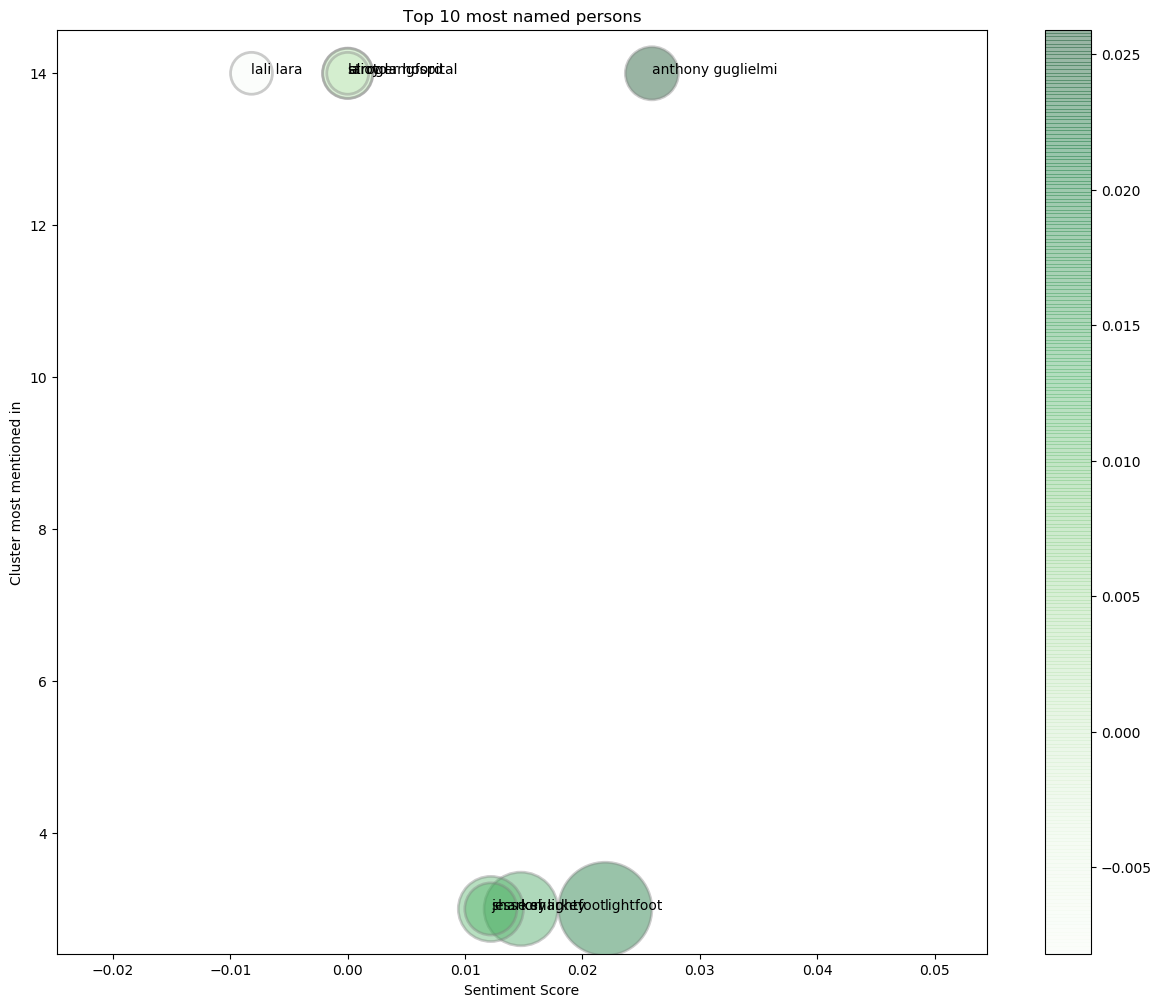

In [815]:
fig, ax = plt.subplots(figsize=(15, 12))
im = ax.scatter(person_df.iloc[:9]['avg_sent_score'], 
                person_df.iloc[:9]['label_max'],
                s=person_df['count'].iloc[0:9]*10, alpha=0.4,
                c=person_df['avg_sent_score'].iloc[0:9],
                cmap="Greens", edgecolors="grey", linewidth=2)

for i, txt in enumerate(person_df.person.iloc[:9]):
    ax.annotate(txt, (person_df.avg_sent_score.iat[i],person_df.label_max.iat[i]))

fig.colorbar(im, ax=ax)
plt.title('Top 10 most named persons')
plt.xlabel('Sentiment Score')
plt.ylabel('Cluster most mentioned in')
plt.show()

In [925]:
text = []

for n in person_df[person_df['avg_sent_score']>0].index:
    text = text+person_df['sentences'][n]

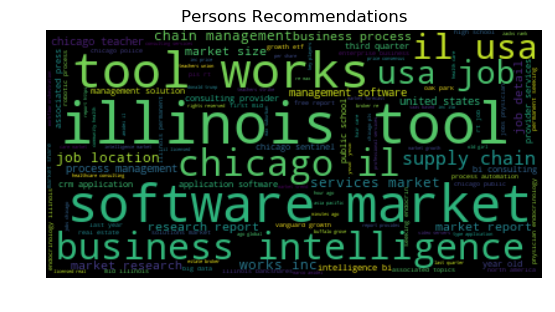

In [926]:

text = ' '.join(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Persons Recommendations')
plt.show()

**lightfoot**

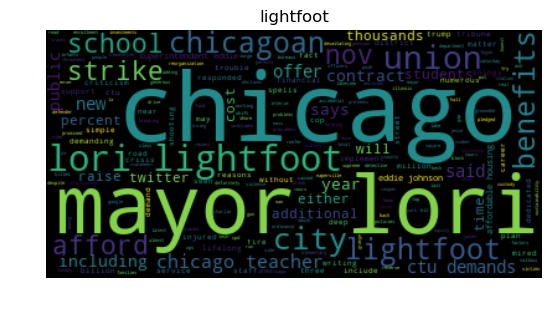

In [848]:
# Start with one review:
text = ' '.join(person_df['sentences'][0])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[0]['person'])
plt.show()

Sentences related:

In [849]:
pd.DataFrame(person_df['sentences'][0])

0
0                                                                                                                                                                        here are 13 reasons why the strike spells trouble for chicago:\nchicagoans can’t afford either the ctu’s demands or lightfoot’s offer.
1                                                                                                                                                                         here are 13 reasons why the strike spells trouble for chicago: chicagoans can’t afford either the ctu’s demands or lightfoot’s offer.
2                                                                                                                           the 6700 block of w. irving park road (google street view)\nchicago mayor lori lightfoot said that the mass shooting is “devastating and almost unfathomable” on twitter saturday .
3                                                                                                                                            an $86 million gap was caused by other factors including a recent move by chicago mayor lori lightfoot to shift $61 million in pension costs to cps from the city.
4                           the chicago tribune, which tracks the number of shooting victims in the city, said 2,313 people had been shot as of sunday, 223 fewer than in 2018. that is also the lowest total since 2015. mayor lori lightfoot has pledged to find solutions to the problems with gun violence.
5                                                                                                                                                                                                                                mayor lori lightfoot’s last contract offer to the union is more than generous.
6                                                                                                                                 [most read] mayor lori lightfoot to reopen detective bureaus, put 151 cops back on street under new reorganization plan »\nnaperville has seen definitely seen that, he said.
7   latest breaking news infants, cpd officers among those injured in hit-and-run on lake shore drive near south side nov 9, 2019 mayor lori lightfoot tours englewood station tech center with charlie beck, new interim top cop nov 9, 2019 chicago man killed in i-55 crash near la grange road nov 9, 20...
8                      “this callous push-out of working class families threatens the very sustainability of this city,” ctu president jesse sharkey said in a statement, adding that mayor lori lightfoot "promised chicagoans she would implement city hall policies and investments grounded in real equity.
9   if the chicago teachers union was the trendsetter in strikes, it may try to do the same for a surge in hiring.union report: the looming chicago teacher strike may be as much about membership as it is about money / headlines / world news / 300,000 students without school as chicago teachers strik...
10                                                                                                                       chicago mayor lori lightfoot responded to trump’s criticism on twitter, writing, “superintendent eddie johnson is a lifelong chicagoan who has dedicated his career to public service.
11                                                                                                                       chicago mayor lori lightfoot responded to trump's criticism on twitter, writing, "superintendent eddie johnson is a lifelong chicagoan who has dedicated his career to public service.
12               the chicago teachers union has rejected what mayor lori lightfoot says is “the most lucrative ctu package in its history.” the union shunned 5-year, 24 percent teacher raises and continues to demand more, including thousands in new hires and additional benefits like affordable housing.
13  the ctu’s demands include a 15 percent rai

**lori lightfoot**

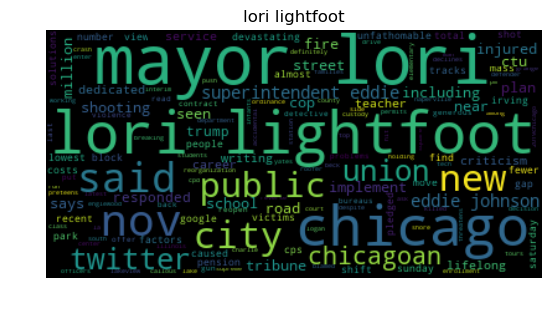

In [850]:
# Start with one review:
text = ' '.join(person_df['sentences'][1])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[1]['person'])
plt.show()

Sentences related:

In [851]:
pd.DataFrame(person_df['sentences'][1])

0
0                                                                                                                           the 6700 block of w. irving park road (google street view)\nchicago mayor lori lightfoot said that the mass shooting is “devastating and almost unfathomable” on twitter saturday .
1                                                                                                                                            an $86 million gap was caused by other factors including a recent move by chicago mayor lori lightfoot to shift $61 million in pension costs to cps from the city.
2                           the chicago tribune, which tracks the number of shooting victims in the city, said 2,313 people had been shot as of sunday, 223 fewer than in 2018. that is also the lowest total since 2015. mayor lori lightfoot has pledged to find solutions to the problems with gun violence.
3                                                                                                                                                                                                                                mayor lori lightfoot’s last contract offer to the union is more than generous.
4                                                                                                                                 [most read] mayor lori lightfoot to reopen detective bureaus, put 151 cops back on street under new reorganization plan »\nnaperville has seen definitely seen that, he said.
5   latest breaking news infants, cpd officers among those injured in hit-and-run on lake shore drive near south side nov 9, 2019 mayor lori lightfoot tours englewood station tech center with charlie beck, new interim top cop nov 9, 2019 chicago man killed in i-55 crash near la grange road nov 9, 20...
6                      “this callous push-out of working class families threatens the very sustainability of this city,” ctu president jesse sharkey said in a statement, adding that mayor lori lightfoot "promised chicagoans she would implement city hall policies and investments grounded in real equity.
7                                                                                                                        chicago mayor lori lightfoot responded to trump’s criticism on twitter, writing, “superintendent eddie johnson is a lifelong chicagoan who has dedicated his career to public service.
8                                                                                                                        chicago mayor lori lightfoot responded to trump's criticism on twitter, writing, "superintendent eddie johnson is a lifelong chicagoan who has dedicated his career to public service.
9                the chicago teachers union has rejected what mayor lori lightfoot says is “the most lucrative ctu package in its history.” the union shunned 5-year, 24 percent teacher raises and continues to demand more, including thousands in new hires and additional benefits like affordable housing.
10                                                                                                                                                         police superintendent eddie johnson and mayor lori lightfoot said chicago is setting up a team to help manage and implement the recommended changes.

**sharkey**

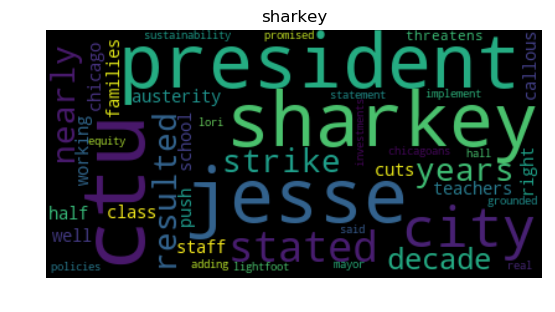

In [852]:
# Start with one review:
text = ' '.join(person_df['sentences'][2])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[2]['person'])
plt.show()

Sentences related:

In [853]:
pd.DataFrame(person_df['sentences'][2])

0
0                                                                                ctu president jesse sharkey himself stated that the years since the 2012 strike resulted in “nearly a decade of austerity and cuts for chicago’s teachers and other school staff.”\nwell, he’s half right.
1  “this callous push-out of working class families threatens the very sustainability of this city,” ctu president jesse sharkey said in a statement, adding that mayor lori lightfoot "promised chicagoans she would implement city hall policies and investments grounded in real equity.

**anthony guglielmi**

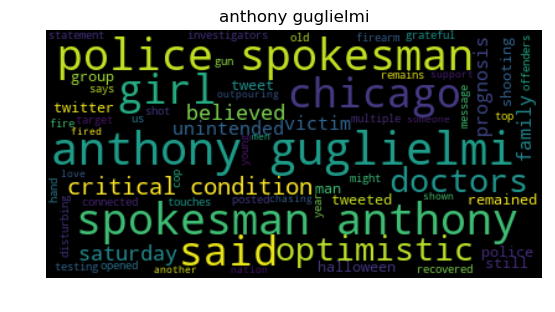

In [854]:
# Start with one review:
text = ' '.join(person_df['sentences'][3])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[3]['person'])
plt.show()

Sentences related:

In [855]:
pd.DataFrame(person_df['sentences'][3])

0
0                                                                                                         “the young girl who was out with family for halloween is believed to be an unintended victim after multiple offenders opened fire,” anthony guglielmi, a spokesman for the police posted on twitter.
1                                                                                                                                                                         the girl was still in critical condition saturday, but doctors remained optimistic, chicago police spokesman anthony guglielmi said.
2                                                                                                                                                                                               the man believed to be the target was a 30-year-old shot in the hand, police spokesman anthony guglielmi said.
3                                                                                                                                                                                                in a tweet, chicago police spokesman anthony guglielmi said the girl was believed to be an unintended victim.
4                                                                                                                                                     in a tweet, chicago police spokesman anthony guglielmi says the girl, who was out with her family for halloween, is believed to be an unintended victim.
5                                                                                                                                              the girl remains in critical condition but doctors are optimistic about her prognosis, chicago police spokesman anthony guglielmi said in a message on twitter.
6                                                                                                                                                     a gun was recovered and investigators were testing the firearm that might be connected to the shooting, chicago police spokesman anthony guglielmi said.
7                                                                                                                                                                        the girl was still in critical condition saturday, but doctors remained optimistic , chicago police spokesman anthony guglielmi said.
8                                                                                                                                                                         police spokesman anthony guglielmi tweeted saturday that she's in critical condition, "but doctors are optimistic about prognosis.''
9  police spokesman anthony guglielmi tweeted saturday that she’s in critical condition, “but doctors are optimistic about prognosis.”\ndisturbing: chicago top cop: girl’s shooting touches us all\nthe girl’s family said in a statement they were “grateful for the outpouring of love and support shown...

**jesse sharkey**

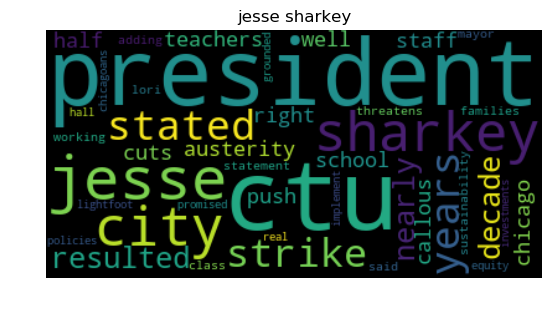

In [856]:
# Start with one review:
text = ' '.join(person_df['sentences'][4])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[4]['person'])
plt.show()

Sentences related:

In [857]:
pd.DataFrame(person_df['sentences'][4])

0
0                                                                                ctu president jesse sharkey himself stated that the years since the 2012 strike resulted in “nearly a decade of austerity and cuts for chicago’s teachers and other school staff.”\nwell, he’s half right.
1  “this callous push-out of working class families threatens the very sustainability of this city,” ctu president jesse sharkey said in a statement, adding that mayor lori lightfoot "promised chicagoans she would implement city hall policies and investments grounded in real equity.

**stroger hospital**

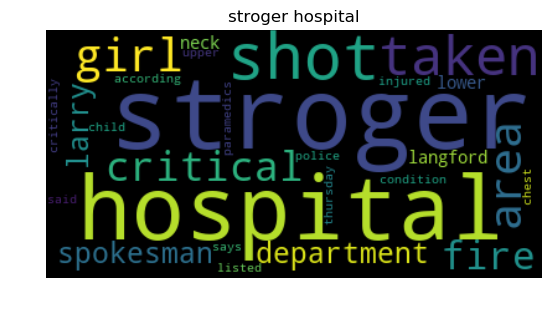

In [858]:
# Start with one review:
text = ' '.join(person_df['sentences'][5])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[5]['person'])
plt.show()

Sentences related:

In [859]:
pd.DataFrame(person_df['sentences'][5])

0
0  the girl, who was shot in the upper chest area, was taken to stroger hospital in critical condition, according to fire department spokesman larry langford.
1                                                                                                    she was critically injured and taken to stroger hospital.
2                                                                the child was shot in the lower neck and listed as critical at stroger hospital, police said.
3             fire department spokesman larry langford says the girl was shot in the lower neck area thursday and was taken by paramedics to stroger hospital.

**larry langford**

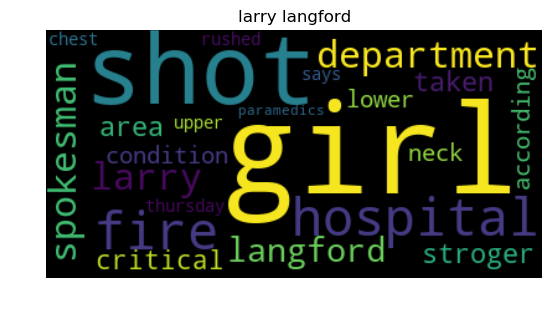

In [860]:
# Start with one review:
text = ' '.join(person_df['sentences'][6])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[6]['person'])
plt.show()

Sentences related:

In [861]:
pd.DataFrame(person_df['sentences'][6])

0
0  the girl, who was shot in the upper chest area, was taken to stroger hospital in critical condition, according to fire department spokesman larry langford.
1                   the girl was shot in the lower neck and rushed to a hospital in critical condition, according to fire department spokesman larry langford.
2             fire department spokesman larry langford says the girl was shot in the lower neck area thursday and was taken by paramedics to stroger hospital.

**lali lara**

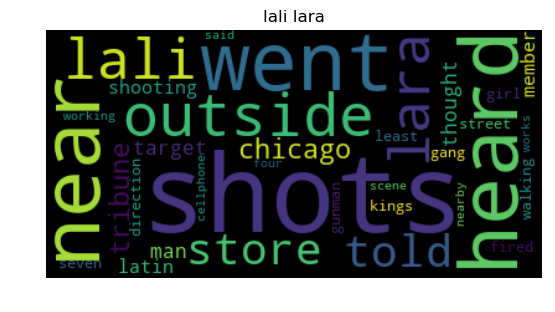

In [862]:
# Start with one review:
text = ' '.join(person_df['sentences'][7])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[7]['person'])
plt.show()

Sentences related:

In [863]:
pd.DataFrame(person_df['sentences'][7])

0
0  the man thought to be the target of the shooting, a member of the latin kings gang, was walking near the girl on the street when the gunman fired at least seven shots in his direction.“we heard the shots ... and i went outside,’’ lali lara, 25, who was working at a store near the scene, told the...
1                                                                                                                                                                    "we heard the shots ... four shots, and i went outside," said lali lara, who works in a nearby cellphone store, told the chicago tribune.

**alioto**

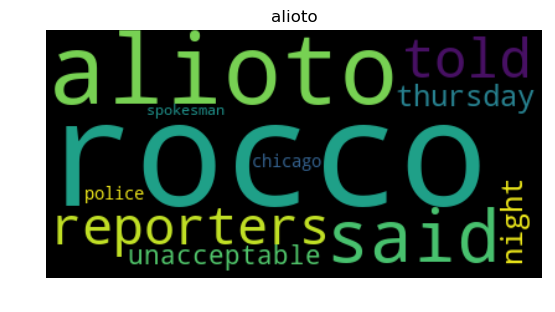

In [864]:
# Start with one review:
text = ' '.join(person_df['sentences'][8])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[8]['person'])
plt.show()

Sentences related:

In [865]:
pd.DataFrame(person_df['sentences'][8])

0
0                                                   rocco alioto said.
1                          rocco alioto told reporters thursday night.
2  "this is unacceptable," chicago police spokesman rocco alioto said.

**rocco**

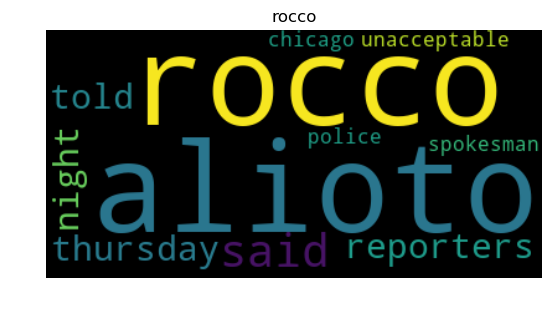

In [866]:
# Start with one review:
text = ' '.join(person_df['sentences'][9])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(person_df.iloc[9]['person'])
plt.show()

Sentences related:

In [867]:
pd.DataFrame(person_df['sentences'][9])

0
0                                                   rocco alioto said.
1                          rocco alioto told reporters thursday night.
2  "this is unacceptable," chicago police spokesman rocco alioto said.